# Accounting Exploratory Data Analysis (EDA)

Standard imports, along with `plotter_funcs` and `bootstrap_funcs`, which are custom defined functions that will help with some of our EDA later.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from plotter_funcs import *
from bootstrap_funcs import *
%matplotlib inline
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
us_accounting = pd.read_csv('./us_accounting_clean.csv')

In [2]:
us_accounting.dtypes

Exit Status                  object
Has CPA                      object
Years Experience            float64
Current Salary + Bonus      float64
Years Public Before Exit    float64
Current Industry             object
What COL is your region?     object
Gender                       object
Line of Service              object
Average Hours Per Week      float64
dtype: object

## Getting familiar with our qualitative data
* Years Experience
* Current Salary + Bonus
* Years Public Before Exit
* Average Hours Per Week

In [3]:
us_accounting.describe()

,Years Experience,Current Salary + Bonus,Years Public Before Exit,Average Hours Per Week
count,1196.000000,1196.000000,216.000000,648.000000
mean,4.149933,85394.138378,3.551542,45.453901
std,3.285605,47304.234455,2.762246,6.779075
min,0.200000,8400.000000,0.000000,16.000000
25%,2.000000,60000.000000,2.000000,40.000000
50%,3.000000,72000.000000,3.000000,45.000000
75%,5.000000,95000.000000,4.000000,50.000000
max,30.000000,750000.000000,27.000000,80.000000


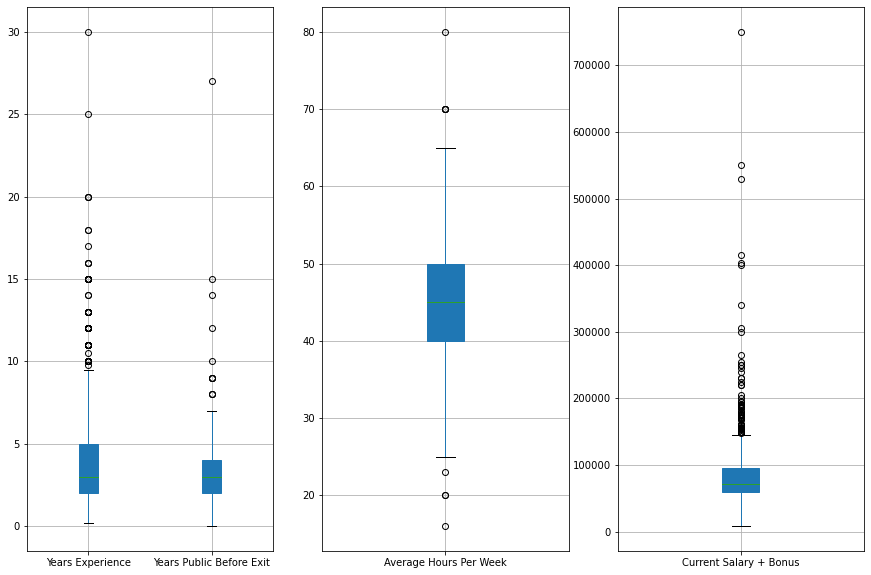

In [4]:
general_cols = ['chocolate', 'bisque', 'teal', 'orchid']
test = ['chocolate', 'basque']
fig, ax = plt.subplots(1,3, figsize=(15,10))

boxplot1 = us_accounting.boxplot(column=['Years Experience', 'Years Public Before Exit'], ax=ax[0], patch_artist=True, return_type='both')
boxplot2 = us_accounting.boxplot(column='Average Hours Per Week', ax=ax[1], patch_artist=True, return_type='both')
boxplot3 = us_accounting.boxplot(column='Current Salary + Bonus', ax=ax[2], patch_artist=True, return_type='both')
#ax[2].set_yticks(np.arange(0, 800_001, 50_000))
# for row_key, (ax, row) in boxplot1.iteritems():
#     for i,box in enumerate(row['boxes']):
#         box.set_facecolor(test[i])

# for row_key, (ax, row) in boxplot2.iteritems():
#     for i,box in enumerate(row['boxes']):
#         box.set_facecolor('teal')
        
# for row_key, (ax, row) in boxplot3.iteritems():
#     for i,box in enumerate(row['boxes']):
#         box.set_facecolor('orchid')
        
plt.show();

**From the descriptive statistics and the boxplots above, most US Accountants:**
* **Have between 0 and 9 years experience**
* **Have worked between 0 and 7 years in a public accounting firm before exiting**
* **Work an average of between 25 and 65 hours per week**
* **Earn between 8,400 and 140,000 annually**

It would be good to get a sense for what the 'typical' US accountant is like.  We'll do so with confidence intervals!

## Confidence Intervals using the bootstrap method to simulate a population

#### Confidence interval for true population mean/median `Current Salary + Bonus` for US accountants

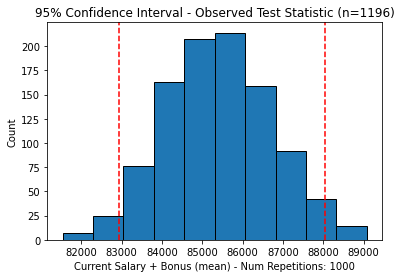

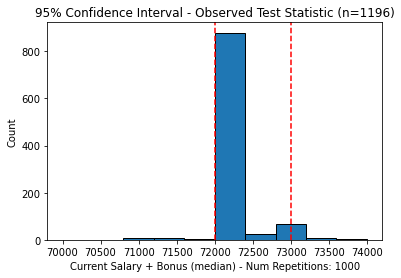


With 95% Confidence, the true population mean Salary + Bonus for US Accountants is between $82,943.04 and $88,041.44.

With 95% Confidence, the true population median Salary + Bonus for US Accountants is between $72,000.00 and $73,000.00.


In [5]:
us_mean_salary = us_accounting['Current Salary + Bonus'].mean()
us_median_salary = us_accounting['Current Salary + Bonus'].median()
sample_size = len(us_accounting['Current Salary + Bonus'])
mean_sal_left, mean_sal_right = get_conf_int(us_accounting, 'Current Salary + Bonus', 1000, 'mean', plot=True)
med_sal_left, med_sal_right = get_conf_int(us_accounting, 'Current Salary + Bonus', 1000, 'median', plot=True)
print()
print('With 95% Confidence, the true population mean Salary + Bonus for US Accountants is between ${:,.2f} and ${:,.2f}.'.format(mean_sal_left, mean_sal_right))
print()
print('With 95% Confidence, the true population median Salary + Bonus for US Accountants is between ${:,.2f} and ${:,.2f}.'.format(med_sal_left, med_sal_right))

Not a bad salary for the typical accountant.  It looks reasonable one could earn at least 70k per year, if not as much as 80-90k.

### Confidence interval for the true population mean/median `'Years Experience'` for US accountants

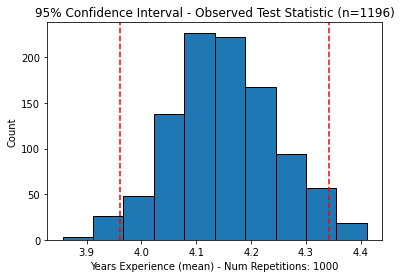

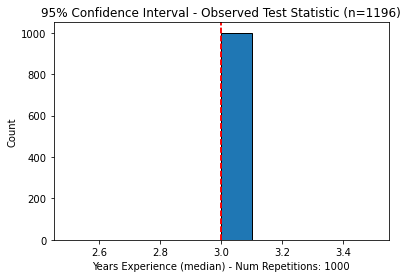


With 95% confidence, the true population mean Years Experience is between 4.0 and 4.3 years.

With 95% confidence, the true population median Years Experience is between 3.0 and 3.0 years.


In [6]:
mean_yrs_exp_left, mean_yrs_exp_right = get_conf_int(us_accounting, 'Years Experience', 1000, 'mean', plot=True)
median_yrs_exp_left, median_yrs_exp_right = get_conf_int(us_accounting, 'Years Experience', 1000, 'median', plot=True)
print()
print('With 95% confidence, the true population mean Years Experience is between {:.1f} and {:.1f} years.'.format(mean_yrs_exp_left, mean_yrs_exp_right))
print()
print('With 95% confidence, the true population median Years Experience is between {:.1f} and {:.1f} years.'.format(median_yrs_exp_left, median_yrs_exp_right))

The typical accountant has roughly 3 or 4 years of experience in the field.

### Confidence interval for the true population mean/median `'Years Public Before Exit'`

Note: we only have a sample size of 216 for this next group because of the way the accounting world is structued.  Typically, an entry level accountant either begins work in a public accounting firm, who does tax and auditing for their clients in the private sector, or they begin working as an accountant for a private industry firm performing tasks like accounts payable/receivable, or other accounting related tasks needed by a private company.
    
With this being the case, the next category `Years Public Before Exit` refers to those accountants who started in a public accounting firm and then exited to transition into an accounting role at a private company, of which there are 216 respondents in the survey.

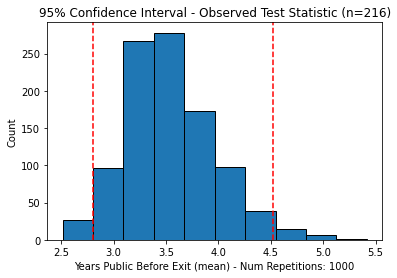

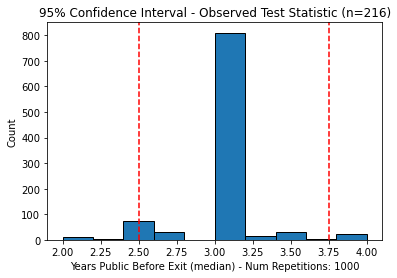


With 95% confidence, the true population mean years in a public accounting firm before exiting is between 2.8 and 4.5 years.

With 95% confidence, the true population median Years in a public accounting firm before exiting is between 2.5 and 3.8 years.


In [7]:
mean_yrs_b4_left, mean_yrs_b4_right = get_conf_int(us_accounting, 'Years Public Before Exit', 1000, 'mean', plot=True)
median_yrs_b4_left, median_yrs_b4_right = get_conf_int(us_accounting, 'Years Public Before Exit', 1000, 'median', plot=True)
print()
print('With 95% confidence, the true population mean years in a public accounting firm before exiting is between {:.1f} and {:.1f} years.'.format(mean_yrs_b4_left, mean_yrs_b4_right))
print()
print('With 95% confidence, the true population median Years in a public accounting firm before exiting is between {:.1f} and {:.1f} years.'.format(median_yrs_b4_left, median_yrs_b4_right))

The typical accountant, who worked in a public accounting firm and then exited to a private industrial firm, has spent roughly 3-5 years in a public accounting firm.  If you remember the previous confidence interval (4.0, 4.3), they would have spent most, if not all, of their career thus far in a public firm.

### Confidence interval for the true population mean/median `'Average Hours Per Week'`

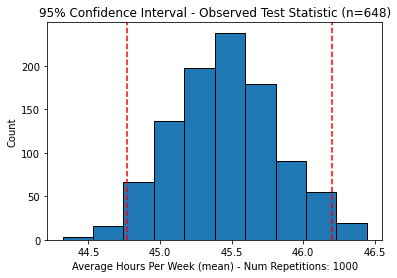

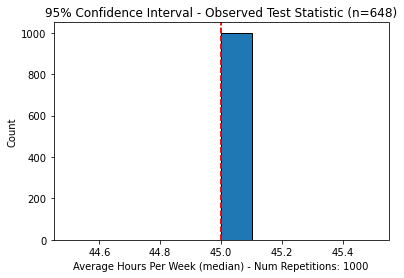


With 95% confidence, the true population mean average hours worked per week is between 44.8 and 46.2 hours.

With 95% confidence, the true population median average hours worked per week is between 45.0 and 45.0 hours.


In [8]:
mean_avg_hrs_left, mean_avg_hrs_right = get_conf_int(us_accounting, 'Average Hours Per Week', 1000, 'mean', plot=True)
median_avg_hrs_left, median_avg_hrs_right = get_conf_int(us_accounting, 'Average Hours Per Week', 1000, 'median', plot=True)
print()
print('With 95% confidence, the true population mean average hours worked per week is between {:.1f} and {:.1f} hours.'.format(mean_avg_hrs_left, mean_avg_hrs_right))
print()
print('With 95% confidence, the true population median average hours worked per week is between {:.1f} and {:.1f} hours.'.format(median_avg_hrs_left, median_avg_hrs_right))

The typical accountant works about 45 or 46 hours per week on average.

**In sum, the typical US accountant:**
* **Earns between 83,000 and 89,000 annually**
* **Has between 3-4 years of experience.**
* **If the accountant worked in Public accounting and has exited, they have spent between 3-5 years in a public accounting firm before exiting**
* **Works 45-46 hours per week**

# Getting familiar with our qualitative data

## Exploring by `'Gender'`

In [9]:
females = us_accounting[us_accounting['Gender'] == 'Female']
males = us_accounting[us_accounting['Gender'] == 'Male']
print('Descriptive Statistics for Female Accountants')
print('-' * 100)
print(females.describe().to_string())
print()
print()
print("Descriptive Statistics for Male Accountants")
print('-' * 100)
print(males.describe().to_string())

Descriptive Statistics for Female Accountants
----------------------------------------------------------------------------------------------------
       Years Experience  Current Salary + Bonus  Years Public Before Exit  Average Hours Per Week
count        262.000000              262.000000                 49.000000              156.000000
mean           4.212595            78845.011450                  3.254755               45.429487
std            3.160262            28756.867626                  2.193291                6.595318
min            0.500000             8400.000000                  0.250000               20.000000
25%            2.000000            60000.000000                  2.000000               40.000000
50%            3.000000            71750.000000                  3.000000               45.000000
75%            5.500000            92850.000000                  4.000000               50.000000
max           18.000000           250000.000000                 14.00

Some interesting things to note are that many of these statistics are quite similar for Male vs Female accountants.  For instance, the mean, median, and std deviation for years experience, years public before exit, and average hours per week are all very close regardless of gender.  There is a difference in mean salary though and differences in max values for years experience, current salary, and years public before exit.  This differedisceprancynce in max salary might be what's causing the difference in mean salary as well. 

### Mean/Median Salary

In [10]:
female_median_salary = females['Current Salary + Bonus'].median()
male_median_salary = males['Current Salary + Bonus'].median()
female_mean_salary = females['Current Salary + Bonus'].mean()
male_mean_salary = males['Current Salary + Bonus'].mean()

Female Accountants
--------------------
Median Salary + Bonus : 71750.0
Mean Salary + Bonus:  78845.01145038167

Male Accountants
--------------------
Median Salary + Bonus: 72000.0
Mean Salary + Bonus:  86028.03125



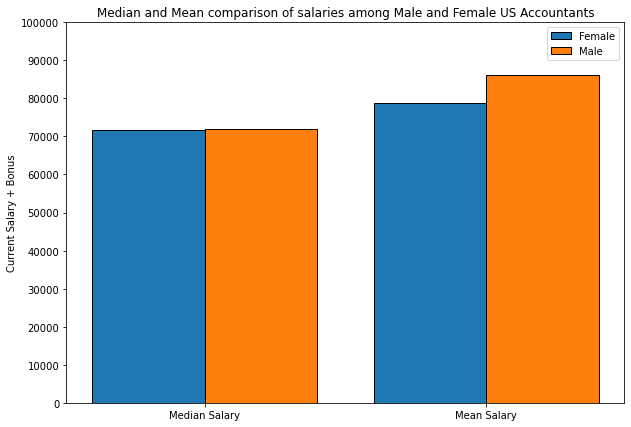

In [11]:
print('Female Accountants')
print('-'*20)
print('Median Salary + Bonus :', female_median_salary)
print('Mean Salary + Bonus: ', female_mean_salary)
print()
print('Male Accountants')
print('-'*20)
print('Median Salary + Bonus:', male_median_salary)
print('Mean Salary + Bonus: ', male_mean_salary)
print()
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(1, female_median_salary, label='Female', width=0.5, color='tab:blue', edgecolor='black')
ax.bar(1.5, male_median_salary, label='Male', width=0.5, color='tab:orange', edgecolor='black')
ax.bar(2.25, female_mean_salary, label='Female', width=0.5, color='tab:blue', edgecolor='black')
ax.bar(2.75, male_mean_salary, label='Male', width=0.5, color='tab:orange', edgecolor='black')
plt.title('Median and Mean comparison of salaries among Male and Female US Accountants')
ax.set_xticks([1.25, 2.5])
ax.set_xticklabels(['Median Salary', 'Mean Salary'])
ax.set_yticks(np.arange(0, 100_001, 10_000))
ax.set_ylabel('Current Salary + Bonus')
# The next three lines remove duplicate entries from the legend by getting the labels and typecasting them as a dict, where the labels are set as keys, which are forced to be unique.
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()

The Median Salary is virtually the same for Male and Female accountants, but we see the gap in the mean mentioned earlier.  This could be caused by high salaries that are predominantly male, let's continue investigating.

### Exploring Line of service by gender - Is there a pay gap among genders in different lines of service?

In [12]:
## This code is the basis for the graph below, groupby Line of Service, then by Gender, and unstacking the MultiIndex to get a psuedo pivot_table
us_accounting.groupby(['Line of Service', 'Gender'])['Line of Service'].count().unstack(level=-1, fill_value=0)

Gender,Female,Male,Undisclosed
Line of Service,,,
Advisory,32,99,5
Audit,92,389,8
Corporate,4,6,0
Finance,1,5,1
Forensic,0,1,0
Intern,0,1,0
Other,38,137,6
Tax,88,252,17
Tax and Audit,7,6,1


In the bar chart below, we can see that if we exclude Undisclosed genders, which comprise only about 3% of the sample, the 'Advisory', 'Audit', 'Other', and 'Tax' Lines of Service are the most common, each with a sample size greater than or equal to 30.

For this reason, I'm only going to compare Male and Female accountants with Lines of Service that have a sample size of 30 or more in most of my analysis based on gender.

Proportion of survey respondents by gender
------------------------------------------------------------
Male           0.749164
Female         0.219064
Undisclosed    0.031773



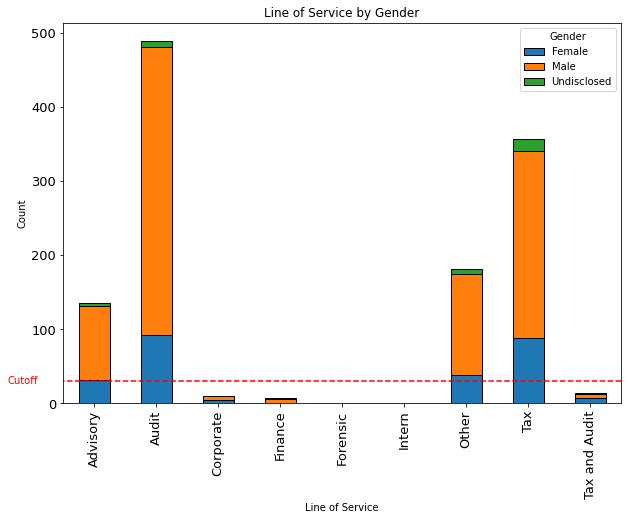

In [13]:
print("Proportion of survey respondents by gender")
print('-'*60)
print(us_accounting['Gender'].value_counts(normalize=True).to_string())
print()
us_accounting.groupby(['Line of Service', 'Gender'])['Line of Service'].count().unstack(level=-1, fill_value=0).plot(kind='bar', stacked=True,figsize=(10,7), fontsize=13, edgecolor='black')
plt.title('Line of Service by Gender')
plt.hlines(30, -3, 10, color='red', linestyle='--')
plt.text(-1.4, 30, 'Cutoff', color='red', ha='left', va='center')
plt.ylabel('Count');

To examine these groups, I plan to extract the labels of the 4 most common Lines of Service for only Female and Male accountants.  With those labels, I'll create a new dataframe, using them as a filter

In [14]:
males_and_females = us_accounting[us_accounting['Gender'] != 'Undisclosed']
# m_f_los_groups = males_and_females.groupby(['Line of Service'])
# group_labels_larger_30 = []
# for name,group in m_f_los_groups:
#     if len(group) >= 30:
#         group_labels_larger_30.append(name)
# male_female_los_larger_30 = males_and_females.loc[males_and_females['Line of Service'].isin(group_labels_larger_30)]

In [15]:
male_female_los_larger_30 = males_and_females.groupby(['Line of Service']).filter(lambda x: len(x) >= 30)

With this new dataframe, we can check if the pay gap occurs between male and female accountants in these different lines of service

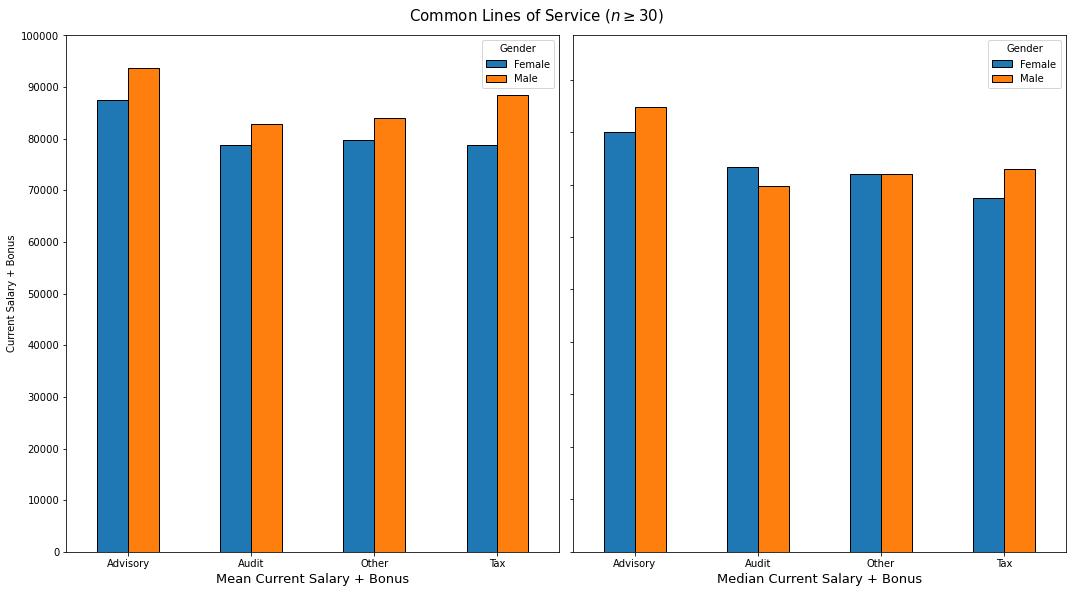

In [16]:
mean_pivot_tbl = male_female_los_larger_30.pivot_table(
    values="Current Salary + Bonus",
    index="Line of Service",
    columns="Gender",
    aggfunc="mean",
)
median_pivot_tbl = male_female_los_larger_30.pivot_table(
    values="Current Salary + Bonus",
    index="Line of Service",
    columns="Gender",
    aggfunc="median",
)
fig, ax = plt.subplots(1, 2, figsize= (15,8), sharey=True)
mean_pivot_tbl.plot(kind='bar', ax=ax[0], ec='black', rot=0)
ax[0].set_xlabel('Mean Current Salary + Bonus', fontsize=13)
ax[0].set_ylabel('Current Salary + Bonus')
median_pivot_tbl.plot(kind='bar', ax=ax[1], ec='black', rot=0)
ax[1].set_xlabel('Median Current Salary + Bonus', fontsize=13)
fig.text(0.5, 1, r'Common Lines of Service $(n\geq30)$', ha='center', fontsize=15)
ax[0].set_yticks(np.arange(0, 100_001, 10_000))
plt.tight_layout()
plt.show()

It looks like the mean salaries of male accountants are higher than female accountants for all of the most frequent accountant Lines of Service in the US.  

Furthermore the median male salary is higher than female accountants in half of the lines of service.  More evidence showing that a pay gap in genders exist.

### Exploring `Current Industry` by Gender - Does the pay gap exist in different industries?

### Does the pay gap we saw in genders across different lines of service also exist across different industries?

In [17]:
industry_df_greater_30 = males_and_females.groupby('Current Industry').filter(lambda x: len(x)>=30)
industry_df_greater_30

,Exit Status,Has CPA,Years Experience,Current Salary + Bonus,Years Public Before Exit,Current Industry,What COL is your region?,Gender,Line of Service,Average Hours Per Week
0,I am currently working at a Big 4 accounting firm,No,3.0,100000.0,NaN,Public Accounting,Medium,Female,Tax,NaN
1,I am currently working at a Big 4 accounting firm,No,3.0,63000.0,NaN,Public Accounting,High,Male,Audit,50.0
2,I am currently working at a mid-tier or local ...,No,3.0,61000.0,NaN,Public Accounting,High,Male,Tax,50.0
3,I am currently working at a mid-tier or local ...,No,3.0,67000.0,NaN,Public Accounting,High,Male,Other,40.0
5,I am currently working at a Big 4 accounting firm,No,0.2,63000.0,NaN,Public Accounting,High,Male,Advisory,NaN
...,...,...,...,...,...,...,...,...,...,...
1190,I am currently working at a mid-tier or local ...,No,10.0,61000.0,NaN,Public Accounting,Low,Female,Audit,50.0
1192,I am currently working at a mid-tier or local ...,Finishing Exp Req,1.0,54000.0,NaN,Public Accounting,Medium,Male,Tax,NaN
1193,I am still in school,No,3.0,64000.0,NaN,Public Accounting,High,Male,Audit,NaN
1194,I am currently working at a Big 4 accounting firm,No,1.0,66900.0,NaN,Public Accounting,Low,Female,Advisory,55.0


In [18]:
industry_df_pivot_tbl = industry_df_greater_30.pivot_table(values='Current Salary + Bonus', index='Current Industry', columns='Gender', aggfunc=['mean','median'])
industry_df_pivot_tbl

mean                   median          
Gender                    Female           Male    Female      Male
Current Industry                                                   
Finance            127068.181818  112697.269841  110000.0  102000.0
Government          93900.000000   66005.291667  103000.0   55000.0
Manufacturing       89636.363636   89151.428571   83000.0   82000.0
Medical             79750.000000  128011.111111   72750.0   85000.0
Other               81224.137931   94527.586207   80000.0   80000.0
Public Accounting   72991.779874   76629.492982   65000.0   68000.0
Technology          79040.625000  121155.000000   76250.0  110000.0

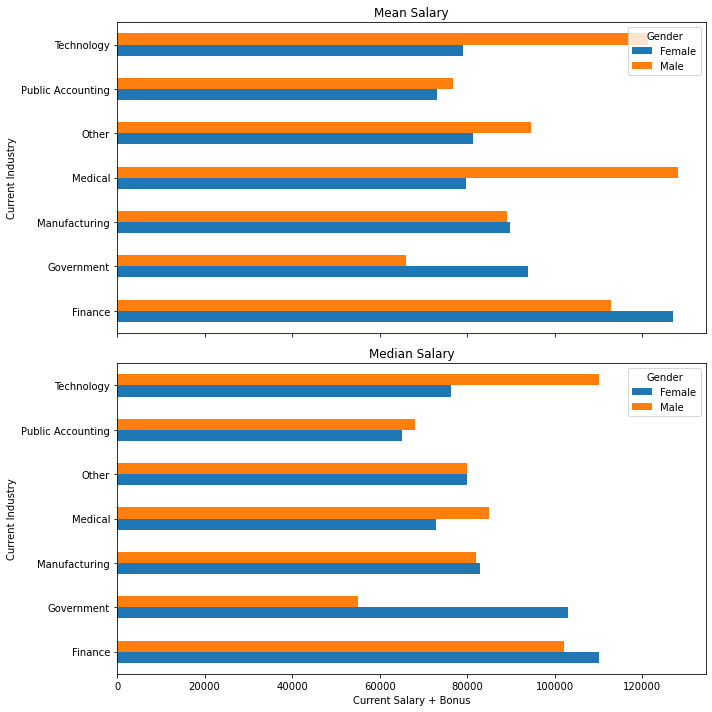

In [19]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize = (10,10))
industry_df_pivot_tbl['mean'].plot.barh(ax = ax[0])
ax[0].set_title('Mean Salary')
#ax[0].legend(bbox_to_anchor=(0.4, 0.8, 0.4, 0.8))

industry_df_pivot_tbl['median'].plot.barh(ax=ax[1])
ax[1].set_title('Median Salary')
ax[1].set_xlabel('Current Salary + Bonus')

plt.tight_layout()
plt.show()

It appears that mean and median Male Salaries tend to be higher for most industries, however not all of them.  For instance, mean and median Female salaries are higher in Manufacturing, Government, and Finance.  These results point towards a little more gender equality, as roughly half, albeit rounding up, of these industries have Female salaries higher than Male salaries.  Mind you, these results alone don't mean there is no gap in pay among genders.

**Summary: So far there is evidence pointing in the direction of a pay gap among genders, but more investigation will be needed.**

### Exploring US Accounting outlier Salaries - What can we learn about gender and pay in these outliers?

To start, we need to separate into several groups, we already have all the salaries, but we also need a group of outliers and non-outliers.  To make the distinction, we'll define a salary as being an outlier if it's outside $\pm2\sigma$ from the mean.

In [20]:
us_salaries = us_accounting['Current Salary + Bonus']
us_sal_mean = np.mean(us_salaries)
us_sal_std = np.std(us_salaries)
lower_fence = us_sal_mean - 2 * us_sal_std
upper_fence = us_sal_mean + 2 * us_sal_std
salaries_without_outliers = us_accounting[(us_salaries >= lower_fence) & (us_salaries <= upper_fence)]
salary_outliers = us_accounting[(us_salaries >= upper_fence) | (us_salaries <= lower_fence)]
num_accountants = len(us_accounting['Current Salary + Bonus'])
num_accountants_not_outliers = len(salaries_without_outliers)
num_accountants_outliers = len(salary_outliers)
print("Number of US Accountants that aren't outliers:", num_accountants_not_outliers)
print("Number of US Accountants that are outliers:", num_accountants_outliers)

Number of US Accountants that aren't outliers: 1159
Number of US Accountants that are outliers: 37


Let's begin by looking at the distribution of salaries for all US accountants when we include outliers, versus when we exclude them.

Descriptive stats for Current Salary + Bonus for ALL US Accountants, including outliers
------------------------------------------------------------------------------------------
count      1196.000000
mean      85394.138378
std       47304.234455
min        8400.000000
25%       60000.000000
50%       72000.000000
75%       95000.000000
max      750000.000000

Descriptive stats for Current Salary + Bonus for US Accountants, WITHOUT outliers
------------------------------------------------------------------------------------------
count      1159.000000
mean      79628.895168
std       27349.147961
min        8400.000000
25%       60000.000000
50%       72000.000000
75%       93800.000000
max      176250.000000



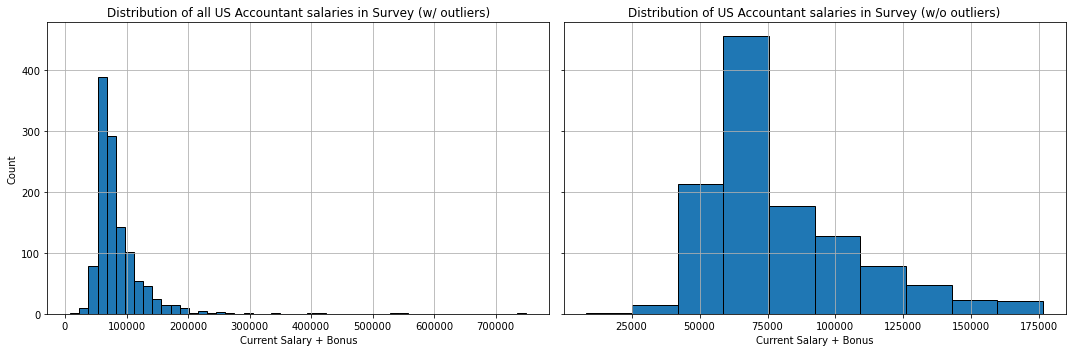

In [21]:
print('Descriptive stats for Current Salary + Bonus for ALL US Accountants, including outliers')
print('-'*90)
print(us_accounting['Current Salary + Bonus'].describe().to_string())
print()
print('Descriptive stats for Current Salary + Bonus for US Accountants, WITHOUT outliers')
print('-'*90)
print(salaries_without_outliers['Current Salary + Bonus'].describe().to_string())
print()
fig100, ax100 = plt.subplots(1, 2, sharey=True)
ax100[0].set(title='Distribution of all US Accountant salaries in Survey (w/ outliers)', xlabel='Current Salary + Bonus', ylabel='Count')
us_accounting['Current Salary + Bonus'].hist(bins=50, ax=ax100[0], figsize=(15,5), edgecolor='black')
ax100[1].set(title='Distribution of US Accountant salaries in Survey (w/o outliers)', xlabel='Current Salary + Bonus')
salaries_without_outliers['Current Salary + Bonus'].hist(ax=ax100[1], edgecolor='black')
plt.tight_layout();

They are both right skewed, but with a max of 176,250 when excluding outliers, as opposed to 750,000 that included outliers.  As expected, removing the outliers lowers the mean salary and the standard deviation.  

Understanding these outliers will likely shed more light on whether the mean salary for male accountants is higher than for female accountants.  Let's look at the outlier salaries next.

#### Outlier Salaries - What makes them special?

Create a function to label each entry in our dataframe as either an outlier salary or not

In [22]:
def is_it_an_outlier(x):
    if x >= lower_fence and x<= upper_fence:
        return 'No'
    else:
        return 'Yes'
us_accounting['Outlier Salary'] = us_accounting['Current Salary + Bonus'].apply(is_it_an_outlier)

Let's see what the distribution of Salaries looks like for these outliers

Descriptive Stats for OUTLIER Current Salary + Bonus for US Accountants
--------------------------------------------------
count        37.000000
mean     265986.486486
std      125017.581346
min      180000.000000
25%      190000.000000
50%      220000.000000
75%      265000.000000
max      750000.000000



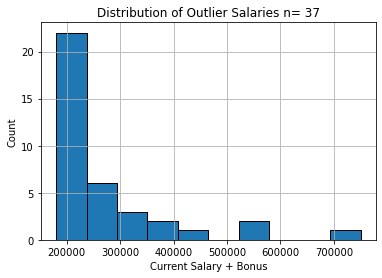

In [23]:
print('Descriptive Stats for OUTLIER Current Salary + Bonus for US Accountants')
print('-'*50)
print(salary_outliers['Current Salary + Bonus'].describe().to_string())
print()
fig5 = plt.figure()
ax5 = fig5.add_subplot(111)
ax5.set(title='Distribution of Outlier Salaries n= ' + str(num_accountants_outliers), xlabel='Current Salary + Bonus', ylabel='Count')
salary_outliers['Current Salary + Bonus'].hist(edgecolor='black');

The distribution still right skewed.  We need to drill down further to gain any insight.

#### Comparing Years Experience - Could these people be earning more because they have more experience?

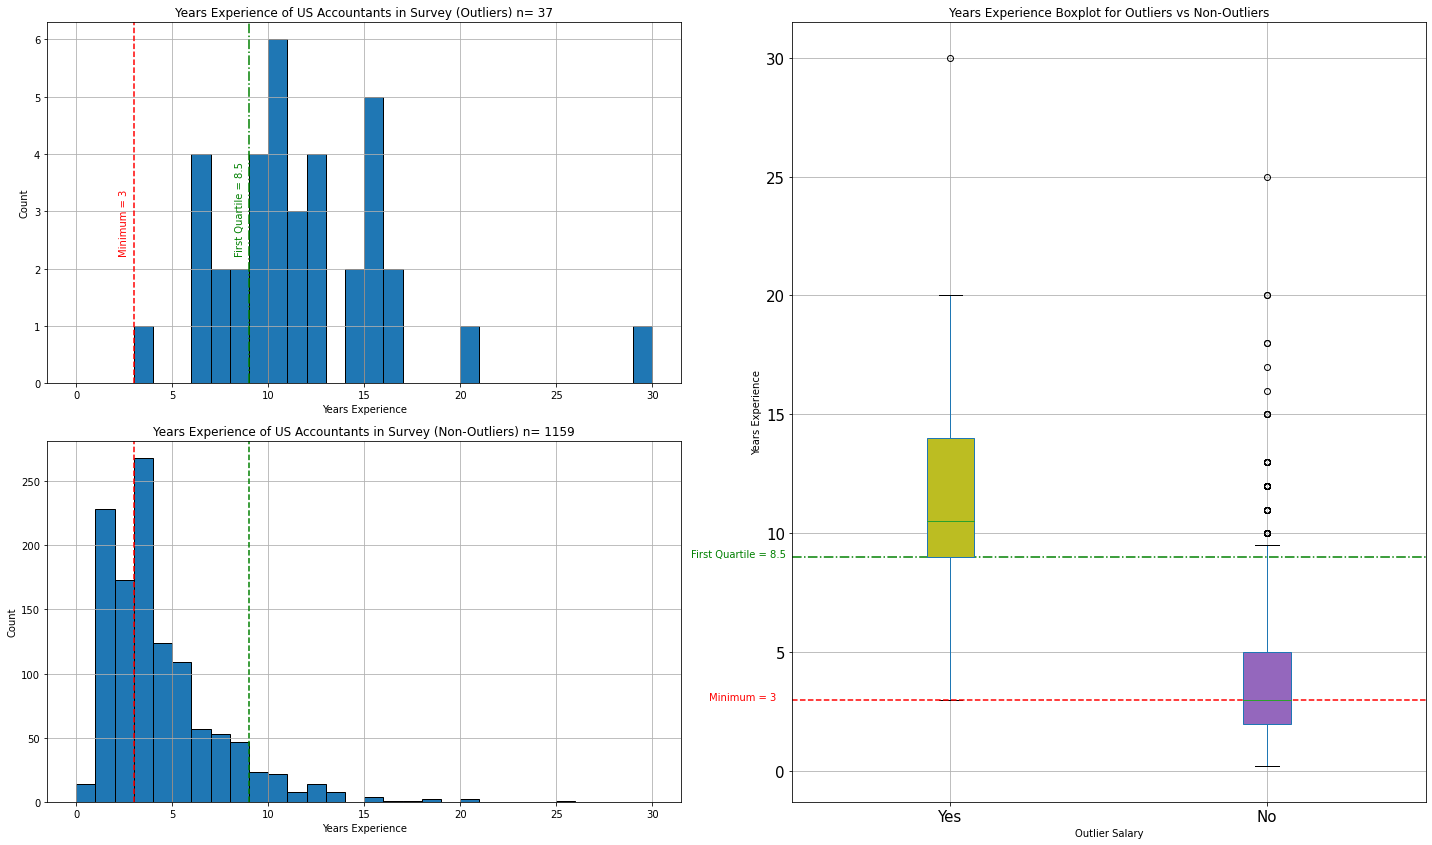

Descriptive stats for Current Salary + Bonus for ALL US Accountants, including outliers
------------------------------------------------------------------------------------------
count    37.000000
mean     11.371622
std       4.763731
min       3.000000
25%       9.000000
50%      10.500000
75%      14.000000
max      30.000000

Descriptive stats for Current Salary + Bonus for US Accountants, WITHOUT outliers
------------------------------------------------------------------------------------------
count    1159.000000
mean        3.919387
std         2.952131
min         0.200000
25%         2.000000
50%         3.000000
75%         5.000000
max        25.000000



In [24]:
yes_no_clrs = ['tab:purple', 'tab:olive']
figure = plt.figure(figsize=(20,12))
a1 = plt.subplot2grid((2,2), (0,0))
a2 = plt.subplot2grid((2,2), (1,0))
a3 = plt.subplot2grid((2,2), (0,1), rowspan=2)

exp_bins = np.arange(0, 31, 1)
#fig5 = plt.figure(figsize=(8,10))
#ax5 = fig5.add_subplot(211)
a1.set(title='Years Experience of US Accountants in Survey (Outliers) n= ' + str(len(salary_outliers)), xlabel='Years Experience', ylabel='Count')
outlier_min_yrs_exp = salary_outliers['Years Experience'].quantile(0)
outlier_first_quartile_yrs_exp = salary_outliers['Years Experience'].quantile(0.25)
a1.axvline(outlier_min_yrs_exp, color='red', linestyle='--')
a1.axvline(outlier_first_quartile_yrs_exp, color='green', linestyle='-.')
a1.text(outlier_min_yrs_exp - 0.75, 2.25, 'Minimum = 3', color='red', rotation=90)
a1.text(outlier_first_quartile_yrs_exp - 0.75, 2.25, 'First Quartile = 8.5', color='green', rotation=90)
salary_outliers['Years Experience'].hist(edgecolor='black', bins = exp_bins, ax=a1)

#ax6 = fig5.add_subplot(212, sharex=ax5)
a2.set(title='Years Experience of US Accountants in Survey (Non-Outliers) n= ' + str(len(salaries_without_outliers)), xlabel='Years Experience', ylabel='Count')
a2.axvline(outlier_min_yrs_exp, color='red', linestyle='--')
a2.axvline(outlier_first_quartile_yrs_exp, color='green', linestyle='--')
#ax6.text(outlier_min - 0.75, 200.25, 'Minimum = 3', rotation=90, color='red')
salaries_without_outliers['Years Experience'].hist(edgecolor='black', bins=exp_bins, ax = a2)

boxplot = us_accounting.boxplot(column='Years Experience', by='Outlier Salary', figsize=(10,5), fontsize=15, positions=[2,1], ax=a3, return_type='both', patch_artist=True)
a3.axhline(outlier_min_yrs_exp, color='red', linestyle='--')
a3.text(0.45, outlier_min_yrs_exp, 'Minimum = 3', ha='right', color='red')
a3.axhline(outlier_first_quartile_yrs_exp, color='green', linestyle='-.')
a3.text(0.48, outlier_first_quartile_yrs_exp, 'First Quartile = 8.5', ha='right', color='green')
a3.set_ylabel('Years Experience')
a3.set_title('Years Experience Boxplot for Outliers vs Non-Outliers')
figure.suptitle('')



for row_key, (ax, row) in boxplot.iteritems():
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(yes_no_clrs[i])
        
plt.tight_layout()
plt.show();

print('Descriptive stats for Current Salary + Bonus for ALL US Accountants, including outliers')
print('-'*90)
print(salary_outliers['Years Experience'].describe().to_string())
print()
print('Descriptive stats for Current Salary + Bonus for US Accountants, WITHOUT outliers')
print('-'*90)
print(salaries_without_outliers['Years Experience'].describe().to_string())
print()

It does look like these outlier accountants tend to have more years of experience as compared to the rest:

* **The minimum years experience (3) for accountants considered an outlier by their salary is higher than 50% of the non-outliers.**
* **The first quartile of outlier years experience (8.5) is higher than at least 75% of the non-outliers.**

It's too bad we don't have any information as to the position within a company of anyone in the survey as this would provide further insight.

### Do these outliers earn more because they work more?

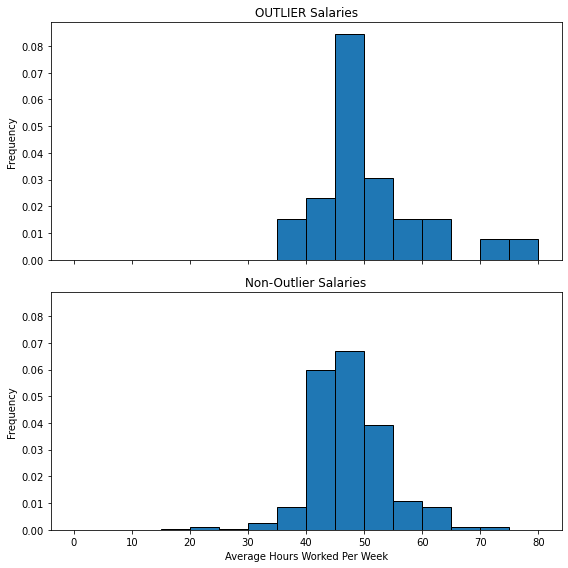

In [25]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(8,8))
salary_outliers['Average Hours Per Week'].plot.hist(ax=ax[0], edgecolor='black', bins = np.arange(0, 81, 5), density=True)
ax[0].set_title('OUTLIER Salaries')
#ax[0].set_xlabel('Average Hours Worked Per Week')

salaries_without_outliers['Average Hours Per Week'].plot.hist(ax=ax[1], edgecolor='black', bins = np.arange(0, 81, 5), density=True)
ax[1].set_title('Non-Outlier Salaries')
ax[1].set_xlabel('Average Hours Worked Per Week')

plt.tight_layout()
plt.show()

The shapes of these distributions are fairly similar.  The majority of accountants work between an average of 40 and 55 hours per week whether their salaries are considered to be an outlier or not.  For accountants considered outliers, there are slightly higher proportions for those who work above 55 hours per week, but overall I don't think there's strong evidence here indicating these outliers earn more because they work more.

#### Outlier by gender - How are the outlier salaries distributed among gender and line of service?
**Note: For the remainder of the outlier analysis by gender, we have excluded Undisclosed genders, bringing us from 37 to 33 accountants considered outliers.**

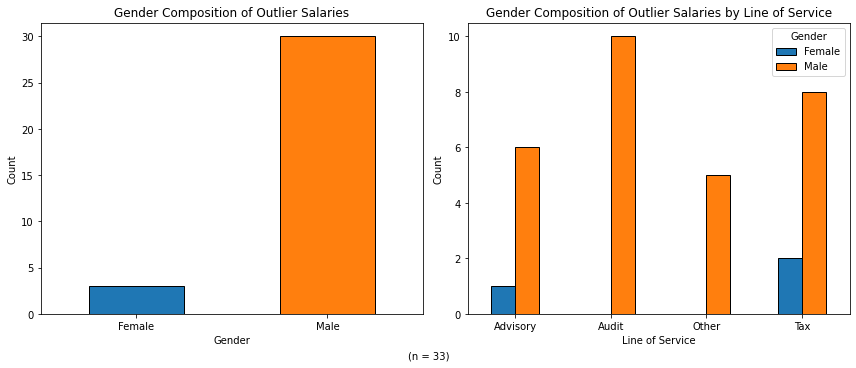

In [26]:
outlier_pivot_tbl = salary_outliers[(salary_outliers['Gender']!='Undisclosed') & (salary_outliers['Line of Service'] != 'Finance')].pivot_table(
    values='Current Salary + Bonus', 
    index='Line of Service', 
    columns='Gender', 
    aggfunc='count', 
    fill_value=0
)
fig, ax = plt.subplots(1,2, figsize=(12,5))
salary_outliers[salary_outliers['Gender']!='Undisclosed']['Gender'].value_counts().sort_values().plot(kind='bar', color=['tab:blue','tab:orange'], ax=ax[0], rot=0, edgecolor='black')
ax[0].set_title('Gender Composition of Outlier Salaries')
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Count')

outlier_pivot_tbl.plot(kind='bar', ax=ax[1], rot=0, edgecolor='black')
ax[1].set_title('Gender Composition of Outlier Salaries by Line of Service')
ax[1].set_ylabel('Count')

fig.text(0.5, 0, '(n = {})'.format(len(salary_outliers[salary_outliers['Gender']!='Undisclosed']['Gender'])), va='center', ha='center')
plt.tight_layout()
plt.show()

An overwhelming majority of these outliers are male accountants, across all of the common lines of service, which is likely causing the pay gap in mean salaries that we observed earlier.  An interesting thing to try later might be a hypothesis test to see if the observed pay gap is caused by random chance or if the mean male salary is truly higher than the mean female salary. 

### Exploring Current Salary + Bonus by `'Gender'` - What can the distribution of salaries by gender tell us?

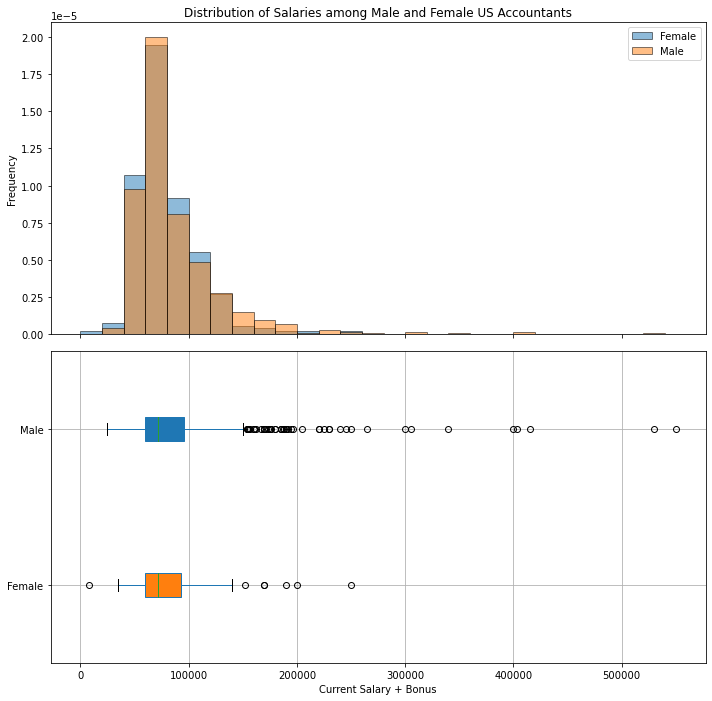

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,262.0,78845.01145,28756.867626,8400.0,60000.0,71750.0,92850.0,250000.0
Male,896.0,86028.03125,46224.577844,25000.0,60000.0,72000.0,96000.0,550000.0


In [27]:
male_and_female_max_sal = males_and_females['Current Salary + Bonus'].max()
m_f_groups = males_and_females.groupby('Gender')
gender_colors = ['tab:orange', 'tab:blue']

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10,10))

m_f_groups['Current Salary + Bonus'].plot.hist(alpha=0.5, bins = np.arange(0, male_and_female_max_sal, 20_000), edgecolor='black', density=True, ax=ax[0])
ax[0].legend()
ax[0].set_title('Distribution of Salaries among Male and Female US Accountants')

boxplot = males_and_females.boxplot(column='Current Salary + Bonus', by='Gender', return_type = 'both', patch_artist=True, ax=ax[1], vert=False)
ax[1].set_title(None)
ax[1].set_xlabel('Current Salary + Bonus')
for row_key, (ax, row) in boxplot.iteritems():
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(gender_colors[i])

plt.suptitle(None)
plt.tight_layout()
plt.show()

m_f_groups['Current Salary + Bonus'].describe()

Based on the descriptive statistics, the 75th percentile and maximum for male salaries are higher than those of female accountants, significantly higher with regards to the maximum.  

In the histogram, the difference between proportions in each bin are quite minimal, however in the right tail, above a salary of 140,000, we see a larger proportion of male accountants.

## Exploring Years Experience based on `'Gender'` - Are there any differences among genders by years experience?

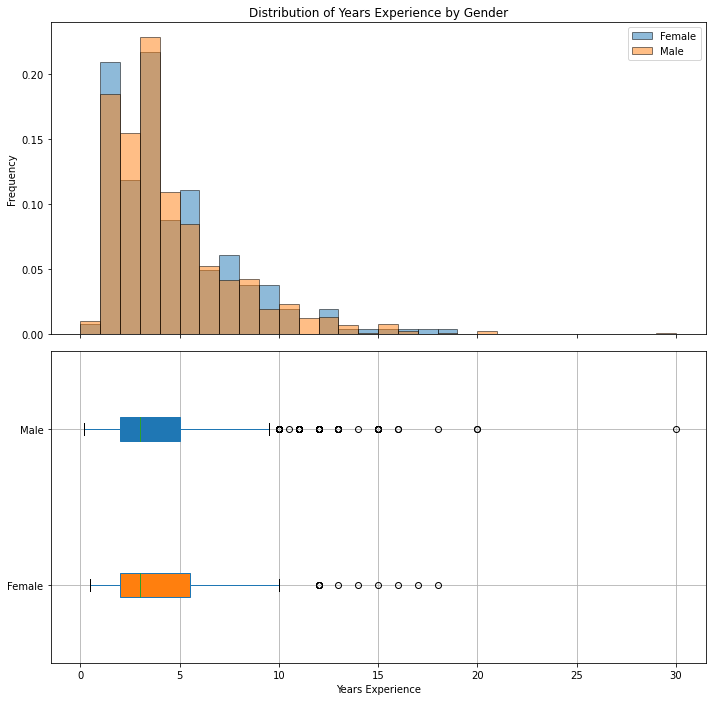

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,262.0,4.212595,3.160262,0.5,2.0,3.0,5.5,18.0
Male,896.0,4.083783,3.189866,0.2,2.0,3.0,5.0,30.0


In [28]:
fig, ax = plt.subplots(2,1, sharex=True, figsize=(10,10))
m_f_groups['Years Experience'].plot.hist(bins=exp_bins, density=True, alpha=0.5, edgecolor='black', ax=ax[0])
ax[0].set_title('Distribution of Years Experience by Gender')
ax[0].set_xlabel(None)
ax[0].legend()

boxplot = males_and_females.boxplot(column='Years Experience', by='Gender', return_type='both', figsize=(7,7), patch_artist=True, ax=ax[1], vert=False)
ax[1].set_title(None)
ax[1].set_xlabel('Years Experience')
for row_key, (ax, row) in boxplot.iteritems():
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(gender_colors[i])


fig.suptitle(None)
plt.tight_layout()
plt.show()

m_f_groups['Years Experience'].describe()

The descriptive statistics for both Male and Female accountants and their years of experience is virtually identical, except with regards to the maximum, which can be seen in the boxplot.  

Looking at the histogram, both distributions are right skewed, which makes sense as there should be many new accountants and fewer accountants with many years experience.  

It might be interesting to run a hypothesis test here to find out if male years experience and female years experience come from the same distribution.

## Exploring by `'Current Salary + Bonus'`
### Exploring Line of Service by Current Salary + Bonus - Do certain Lines of Service earn more?

Let's figure out which Lines of Service have a sample size of 30 or more and then explore those.

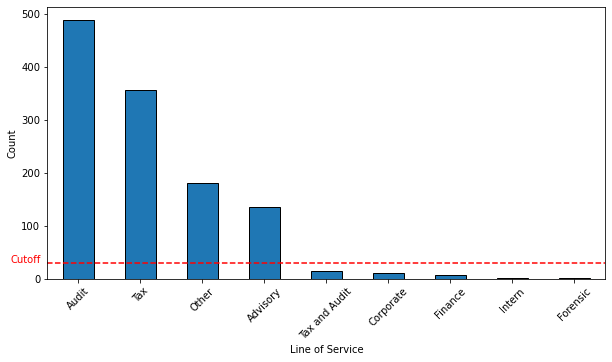

In [29]:
fig, ax = plt.subplots()
us_accounting['Line of Service'].value_counts().plot(kind='bar', edgecolor='black', ax=ax, figsize=(10,5), rot=45)
ax.axhline(30, color='red', linestyle='--')
ax.text(-1.1, 30, 'Cutoff', ha='left', color='red')
ax.set_ylabel('Count')
ax.set_xlabel('Line of Service')
plt.show()

Since Audit, Tax, Other, and Advisory meet our cutoff of 30 or more respondents, we'll create a new dataframe consisting of just those groups and explore their Salaries.

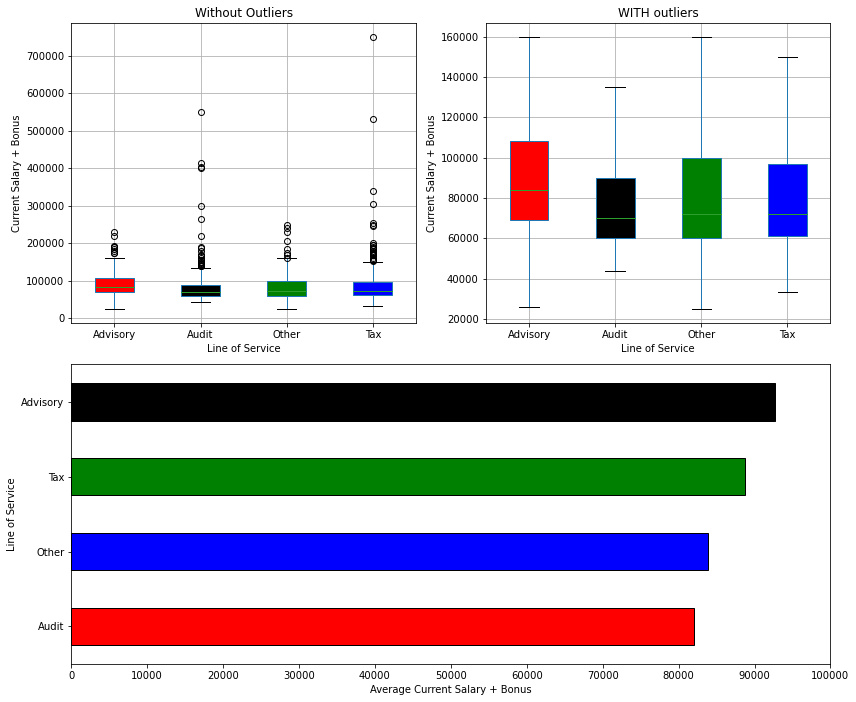

,count,mean,std,min,25%,50%,75%,max
Line of Service,,,,,,,,
Advisory,136.0,92729.058824,36718.606294,26000.0,69000.0,84000.0,108500.0,230000.0
Audit,489.0,82085.687117,44469.190849,44000.0,60000.0,70000.0,90000.0,550000.0
Other,181.0,83842.679558,37642.241965,25000.0,60000.0,72000.0,100000.0,250000.0
Tax,357.0,88680.585434,58067.571625,33600.0,61000.0,72000.0,97000.0,750000.0


In [30]:
los_df_larger_30 = us_accounting.groupby('Line of Service').filter(lambda x: len(x)>= 30)

los_colors = ['red', 'black', 'green', 'blue']
fig = plt.figure(figsize=(12,10))
gs = GridSpec(2,2, figure=fig)
#fig, ax = plt.subplots(1,2, figsize=(14,7))
ax1 = fig.add_subplot(gs[0, 0])
boxplot1 = los_df_larger_30.boxplot(column='Current Salary + Bonus', by='Line of Service', ax=ax1, patch_artist=True, return_type='both')
ax1.set_title('Without Outliers')
ax1.set_ylabel('Current Salary + Bonus')

ax2 = fig.add_subplot(gs[0,1])
boxplot2 = los_df_larger_30.boxplot(column='Current Salary + Bonus', by='Line of Service', ax=ax2, patch_artist=True, return_type='both', showfliers=False)
ax2.set_title('WITH outliers')
ax2.set_ylabel('Current Salary + Bonus')
for row_key, (ax, row) in boxplot1.iteritems():
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(los_colors[i])
for row_key, (ax, row) in boxplot2.iteritems():
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(los_colors[i])

ax3 = fig.add_subplot(gs[1,:])
los_df_larger_30.groupby('Line of Service')['Current Salary + Bonus'].agg('mean').sort_values().plot(kind='barh', color=['red', 'blue', 'green', 'black'], edgecolor='black', ax=ax3)
ax3.set_xlabel('Average Current Salary + Bonus')
ax3.set_xticks(np.arange(0, 100_001, 10_000))
plt.suptitle(None)
plt.tight_layout()
plt.show()

los_df_larger_30.groupby('Line of Service')['Current Salary + Bonus'].describe()

Advisory seems to have the highest mean and median salaries, yet tends to have less outliers.  

On the other hand, Tax has the second highest mean and median salaries, yet with more outliers, one of which has the maximum salary in our dataset. 

It's interesting how Audit has the lowest mean Salary, yet it has a significant number of outliers.  If we exclude outliers, Audit has the narrowest range of salaries.

### Do certain lines of service earn more because they work more?

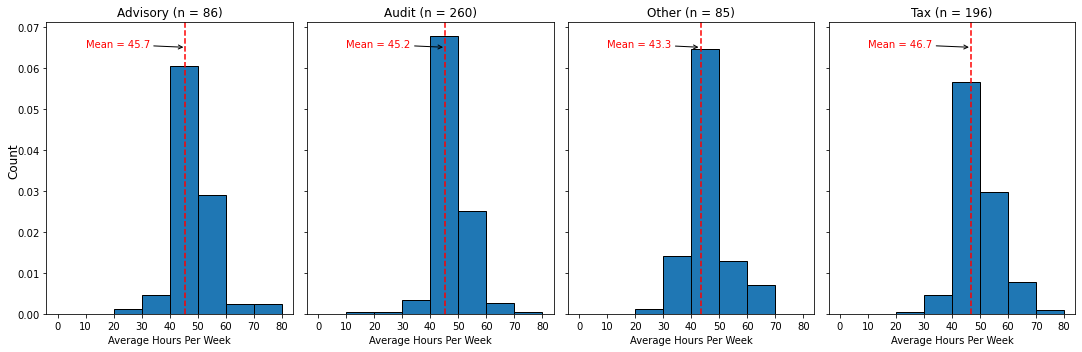

In [31]:
groups = us_accounting[us_accounting['Average Hours Per Week'].notnull()==True].groupby('Line of Service')
fig, ax = plt.subplots(1, 4, figsize=(15,5), sharex=True, sharey=True)
i=0
for name, group in groups:
    sample_size = len(groups.get_group(name)) 
    if sample_size >= 30:
        group_mean = group['Average Hours Per Week'].mean()
        ax[i].hist(group['Average Hours Per Week'], bins = np.arange(0, 81, 10), label=name, edgecolor='black', density=True)
        #us_accounting[us_accounting['Line of Service'] == name]['Average Hours Per Week'].plot(kind='hist', edgecolor='black', alpha=0.5, label=name)
        ax[i].set_xlabel('Average Hours Per Week')
        ax[i].set_title(name + " (n = " + str(sample_size) +")")
        ax[i].axvline(group_mean, color='red', ls='--')
        ax[i].set_xticks(np.arange(0, 81, 10))
        ax[i].annotate('Mean = {:.1f}'.format(group_mean), xy=(group_mean, 0.065), xytext=(10, 0.065), color='red', arrowprops= {'arrowstyle':'->', 
                'connectionstyle':'arc3'})
        i+=1
fig.text(0.001, 0.5, 'Count', rotation='vertical', fontsize=12)
fig.tight_layout();

The distribution of Average Hours Per Week looks pretty similar for Advisory, Audit, and Tax, all of which have very similar means.  The only exception is the Other category, where there are slightly more accountants concentrated in the lower Average hours per week and the mean is slightly lower as a result.

So far, it seems like 45+ hours per week is fairly typical for an accountant and the discepancy in mean/median salaries seems to be for reasons other than the amount of hours one works per week.

#### What do the distributions of Salaries by Line of Service tell us?

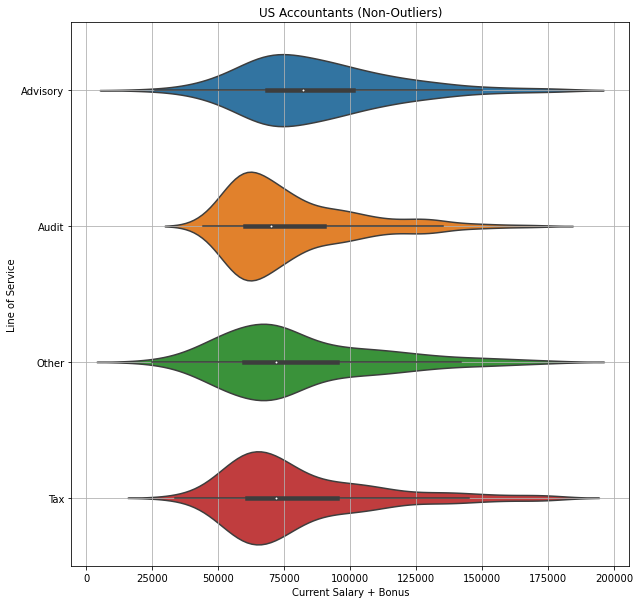

In [32]:
common_los_no_outliers = salaries_without_outliers[salaries_without_outliers['Line of Service'].isin(['Advisory', 'Audit', 'Tax', 'Other'])]
common_los_no_outliers_sorted = common_los_no_outliers.sort_values('Line of Service')

plt.figure(figsize=(10,10))
sns.violinplot(y='Line of Service', x='Current Salary + Bonus', data=common_los_no_outliers_sorted)
plt.title('US Accountants (Non-Outliers)')
plt.grid()
plt.show()

These distributions are all right skewed and all appear very similar.  Salaries seem to be roughly distributed in the same way across these four lines of service.

### Exploring Cost of Living (COL) by Current Salary + Bonus - Do we see a change in salary based on COL?

In [33]:
us_accounting['What COL is your region?'].value_counts()

Medium    532
High      490
Low       174
Name: What COL is your region?, dtype: int64

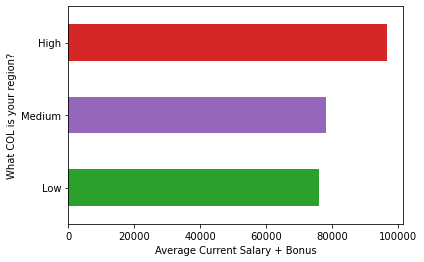

In [34]:
col_colors = ['tab:green', 'tab:purple', 'tab:red']
us_accounting.groupby('What COL is your region?').agg('mean')['Current Salary + Bonus'].sort_values(ascending=True).plot(kind='barh', color=col_colors)
plt.xlabel('Average Current Salary + Bonus');

Average salaries are very similar for Medium or Low COL, however there is a sizeable salary increase for High COL.

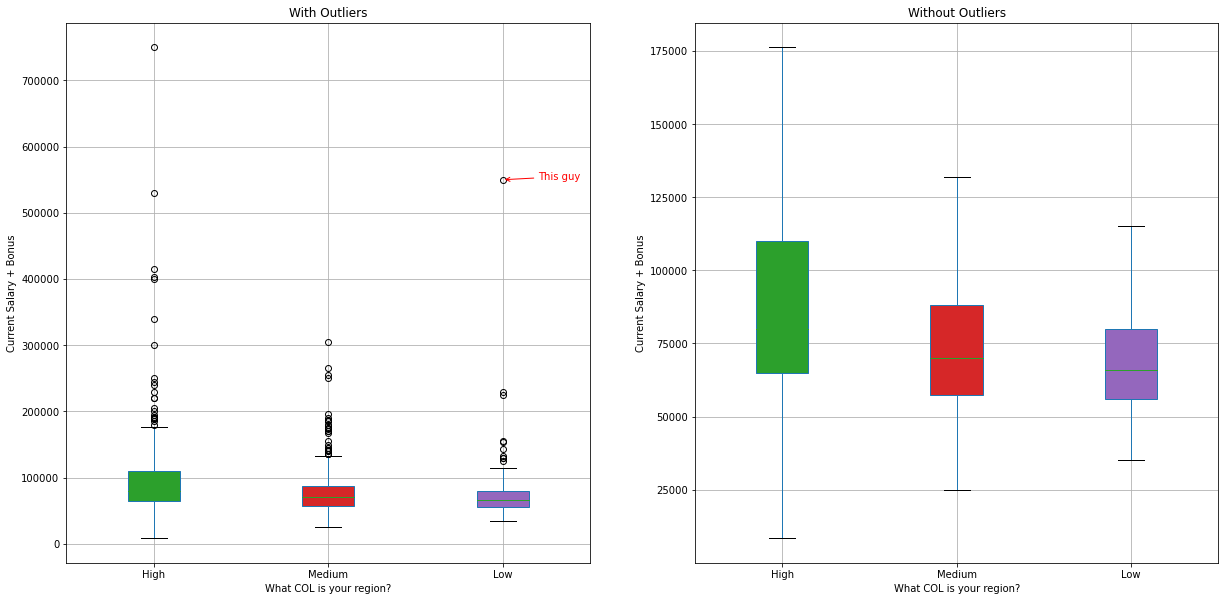


                          count          mean           std      min       25%      50%       75%       max
What COL is your region?                                                                                   
High                      490.0  96681.777551  58182.964830   8400.0  65000.00  80000.0  110000.0  750000.0
Low                       174.0  75959.741379  45443.208858  35000.0  56000.00  66075.0   80000.0  550000.0
Medium                    532.0  78083.314850  32330.583633  25000.0  57437.25  70000.0   88000.0  305000.0



In [35]:
col_groups = us_accounting.groupby('What COL is your region?')

fig, ax = plt.subplots(1,2, figsize=(20,10))
boxplot1 = us_accounting.boxplot(
    column='Current Salary + Bonus', 
    by='What COL is your region?', 
    positions=[1, 3, 2], 
    ax=ax[0], 
    patch_artist=True, 
    return_type='both'
)
ax[0].set_title('With Outliers')
ax[0].set_ylabel('Current Salary + Bonus')
ax[0].annotate(
    'This guy', 
    xy=(3, 550_000), 
    xytext=(3.2, 550_000),
    color='red',
    arrowprops={'arrowstyle':'->', 
                'connectionstyle':'arc3',
                "color":'red'
                }
)
        
        
boxplot2 = us_accounting.boxplot(
    column='Current Salary + Bonus', 
    by='What COL is your region?', 
    positions=[1, 3, 2], 
    ax=ax[1],
    patch_artist=True,
    return_type='both',
    showfliers=False
)
ax[1].set_title('Without Outliers')
ax[1].set_ylabel('Current Salary + Bonus')

for row_key, (ax, row) in boxplot1.iteritems():
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(col_colors[i])

for row_key, (ax, row) in boxplot2.iteritems():
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(col_colors[i])

plt.suptitle(None)
plt.show()

print()
print(col_groups['Current Salary + Bonus'].describe().to_string())
print()

* **High COL has the widest range, with or without outliers.**

* **Medium COL nearly has the second widest range without outliers and nearly the second largest withoutliers, however there is one outlier (see 'This Guy' in Boxplot) in Low COL that prevents this from being true.**

* **Low COL has the narrowest range for non-outliers and technically the second widest range with outliers, because of that one pesky outlier again.**

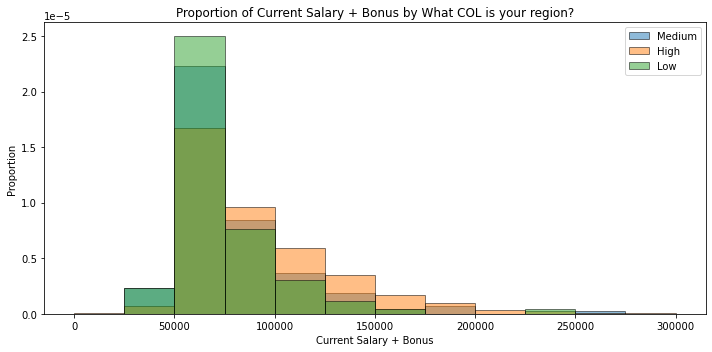

In [36]:
distribution_plotter_fancy(us_accounting, 'What COL is your region?', 'Current Salary + Bonus', bins = np.arange(0, 300_001, 25_000), normal=True)

Based on the histogram above, people with High COL do tend to have greater proportions of accountants who earn higher salaries compared to Medium COL, which its highest proportions in the medium salary range low COL has the greatest proportions in the lowest salaries.

**Overall, it looks like salary does change based on COL, however it is most noticeable going from Medium to High COL**

# Exploring by `'Has CPA'` - Which accountants have their CPA and which don't?

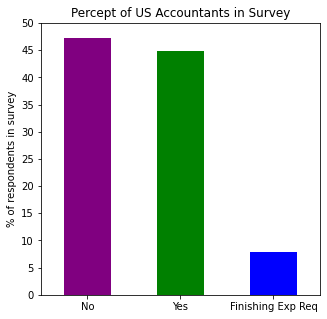

In [37]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
(us_accounting['Has CPA'].value_counts(normalize=True) * 100).plot(kind='bar', color=['purple', 'green', 'blue'], rot=0, ax=ax)
ax.set_title('Percept of US Accountants in Survey')
ax.set_ylabel('% of respondents in survey')
ax.set_yticks(np.arange(0, 51, 5))
plt.show()

It's interesting to note that while the majority of US accountants in this survey don't have their CPA, roughly the same proportion of accountants do have their CPA.

### Has CPA by `'Gender'`

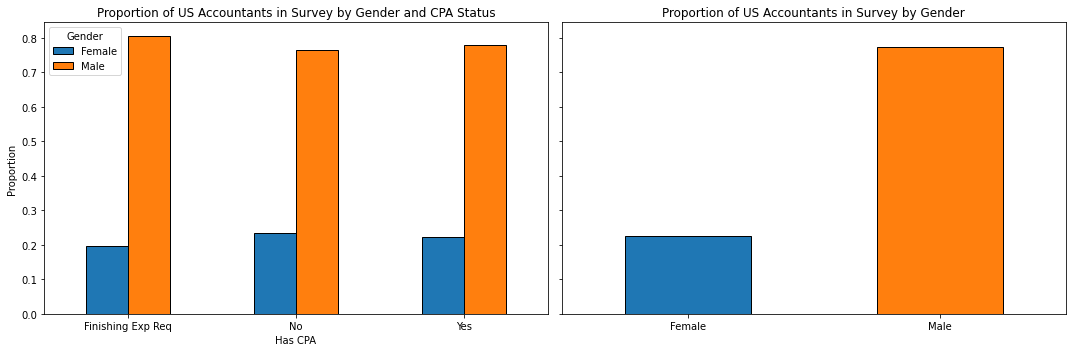

In [38]:
fig, ax = plt.subplots(1,2,sharey=True, figsize=(15,5))
cpa_gender_cross_tab = pd.crosstab(males_and_females['Has CPA'], males_and_females['Gender'], normalize='index')
cpa_gender_cross_tab.plot.bar(rot=0, edgecolor='black', ax=ax[0])
ax[0].set_ylabel('Proportion')
ax[0].set_title('Proportion of US Accountants in Survey by Gender and CPA Status')

males_and_females['Gender'].sort_values().value_counts(normalize=True, ascending=True).plot.bar(rot=0, ax=ax[1], color=[gender_colors[1], gender_colors[0]], edgecolor='black')
ax[1].set_title('Proportion of US Accountants in Survey by Gender')
plt.tight_layout()
plt.show()

If we drill down further by gender, the proportion of men to women who have their CPA seems to be the same in each of the three categories, hovering around 0.8 for men and 0.2 for women.  **These proportions are *very similar* to that of men to women in general, which indicates these proportions may come from the same distribution and there is no difference between male and female accountants with regards to a preference for having a CPA or not.**

### Has CPA by '`Line of Service'`

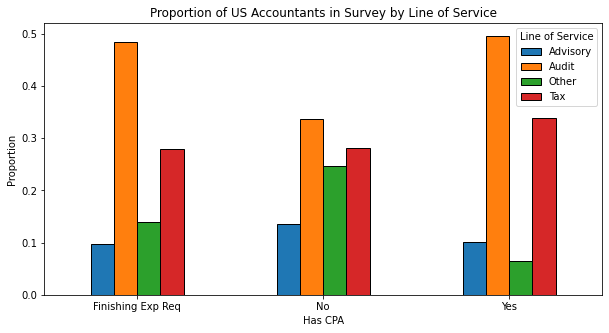

In [39]:
pd.crosstab(los_df_larger_30['Has CPA'], los_df_larger_30['Line of Service'], normalize='index').plot.bar(edgecolor='black', rot=0, figsize=(10,5))
plt.ylabel('Proportion')
plt.title('Proportion of US Accountants in Survey by Line of Service')
plt.show()

**NEED TO REVISIT THIS AFTER normalize='index'**

The greatest proportion of US Accountants who have their CPA occurs in Audit and then secondmost in Tax.  For accountants who don't have their CPA, we see the same thing, the greatest proportion occurs in Audit and the second most in Tax, as well as for those who are finishing their Experience Requirements.  This could be because Audit and Tax are the two most common Lines of Service so we expect people in these Lines of Service to comprise a high proportion of the entire sample as a consequence.

One important difference is that for accountants with their CPA, there is a fairly large difference in proportions between the Audit/Tax lines of service and the Advisory/Other, and we see a greater concentration of accountants without their CPAs in the Advisory/Other categories.  Perhaps it is much more important to have your CPA when working in Audit/Tax, while there is lesser importance for the Advisory/Other fields.

**To summarize:**
* **While the majority of US accountants don't have their CPA, there is little difference among proportions for those who don't and those who do.**
* **The proportions of male and female accountants who don't have their CPA is virtually identical to those who do.**
* **We see the the greatest cocentration of accountants without their CPA in Advisory/Other lines of service, while the greatest concentration who do is in Audit/Tax**

### Has CPA by `'Current Salary + Bonus'` - Is getting the CPA worth it, will it help you achieve a higher salary?

Because we are interested in answering whether getting the CPA is worth it in regards to salary and bonuses, I'm going to exclude those who are still finishing their experience requirments and focus on only accountants that do or don't have their CPA.

In [40]:
yes_no_cpa_df = us_accounting[us_accounting['Has CPA'] != 'Finishing Exp Req']

#### Mean/Median Current Salary + Bonus

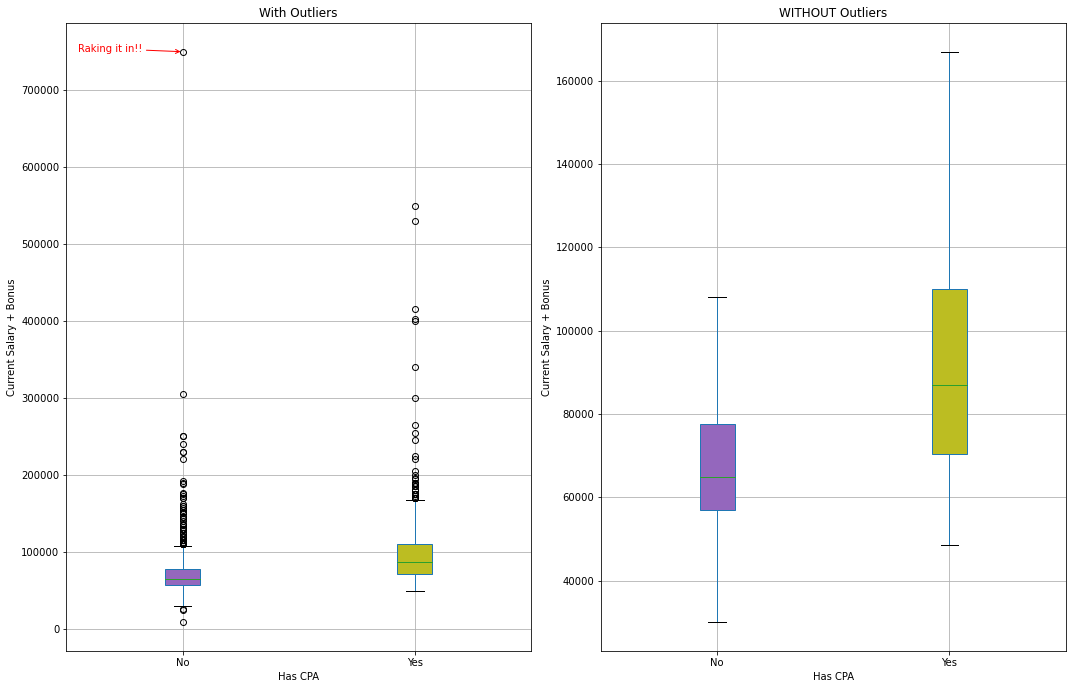

,count,mean,std,min,25%,50%,75%,max
Has CPA,,,,,,,,
No,565.0,75760.068142,43389.598448,8400.0,57000.0,65000.0,77500.0,750000.0
Yes,537.0,99027.290503,51101.860027,48500.0,70500.0,87000.0,110000.0,550000.0


In [41]:
fig, ax = plt.subplots(1,2, figsize=(15,10))
boxplot1 = yes_no_cpa_df.boxplot(column='Current Salary + Bonus', by='Has CPA', figsize=(5,10), ax=ax[0], patch_artist = True, return_type = 'both')
ax[0].set_title('With Outliers')
ax[0].set_ylabel('Current Salary + Bonus')
ax[0].annotate('Raking it in!!', xy=(1, 750_000), xytext=(0.55, 750_000), color='red', arrowprops={'arrowstyle':'->', 
                'connectionstyle':'arc3', 'color':'red'})

boxplot2 = yes_no_cpa_df.boxplot(column='Current Salary + Bonus', by='Has CPA', figsize=(5,10), ax=ax[1], patch_artist = True, return_type = 'both', showfliers=False)
ax[1].set_title('WITHOUT Outliers')
ax[1].set_ylabel('Current Salary + Bonus')
plt.tight_layout()
plt.suptitle(None)

for row_key, (ax, row) in boxplot1.iteritems():
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(yes_no_clrs[i])

for row_key, (ax, row) in boxplot2.iteritems():
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(yes_no_clrs[i])
        
plt.show()

yes_no_cpa_df.groupby('Has CPA')['Current Salary + Bonus'].describe()

* Looking at the boxplots without outliers, the range of salaries increases as one goes from not having their CPA, to having their CPA.  This would also be true when we include outliers, except for one accountant without their CPA who seems to be raking it in at 750,000 annually!  

* Regardless of whether outliers are present, we see an increase with the median Salary + Bonus as one goes from not having their CPA, to having their CPA.  

* In the descriptive statistics, we see the same pattern with mean Salary + Bonus. 

### Mean Salary by Line of Service by Has CPA - digging further into the average

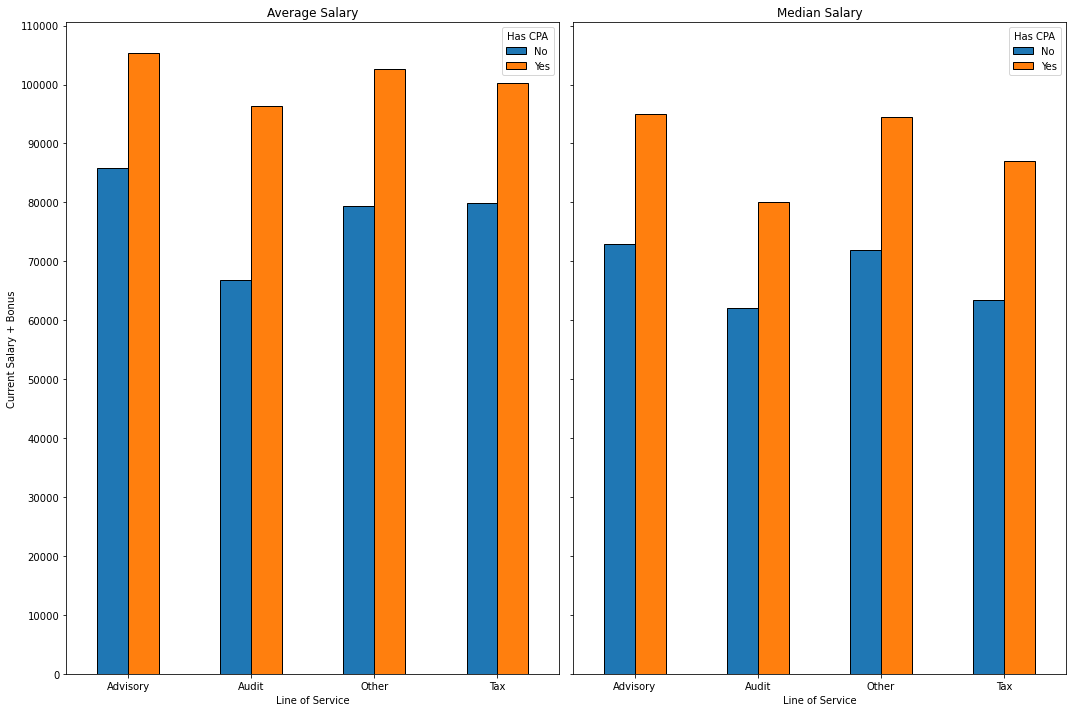

Has CPA                    No            Yes  Salary Diff of means
Line of Service                                                   
Advisory         85844.756757  105276.226415          19431.469658
Audit            66796.502732   96352.279693          29555.776961
Other            79398.320896  102651.470588          23253.149693
Tax              79884.307190  100261.629213          20377.322024

Has CPA               No      Yes  Salary Diff of medians
Line of Service                                          
Advisory         73000.0  95000.0                 22000.0
Audit            62000.0  80000.0                 18000.0
Other            72000.0  94500.0                 22500.0
Tax              63500.0  87000.0                 23500.0


In [42]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10,8))

mean_salary_by_los_and_cpa = los_df_larger_30[los_df_larger_30['Has CPA'] != 'Finishing Exp Req'].pivot_table(values='Current Salary + Bonus', columns='Has CPA', index='Line of Service', aggfunc='mean')
mean_salary_by_los_and_cpa['Salary Diff of means'] = mean_salary_by_los_and_cpa['Yes'] - mean_salary_by_los_and_cpa['No'] 

mean_salary_by_los_and_cpa.plot(y=['No', 'Yes'], kind='bar', figsize=(15,10), edgecolor='black', rot=0, ax=ax[0])
ax[0].set_title('Average Salary')
ax[0].set_yticks(np.arange(0, 110_001, 10_000))
ax[0].set_ylabel('Current Salary + Bonus')
   
median_salary_by_los_and_cpa = los_df_larger_30[los_df_larger_30['Has CPA'] != 'Finishing Exp Req'].pivot_table(values='Current Salary + Bonus', columns='Has CPA', index='Line of Service', aggfunc='median')
median_salary_by_los_and_cpa['Salary Diff of medians'] = median_salary_by_los_and_cpa['Yes'] - median_salary_by_los_and_cpa['No'] 

median_salary_by_los_and_cpa.plot(y=['No', 'Yes'], kind='bar', figsize=(15,10), edgecolor='black', rot=0, ax=ax[1])
ax[1].set_title('Median Salary')
ax[1].set_ylabel('Median Current Salary + Bonus')
   
plt.tight_layout()
plt.show()

print(mean_salary_by_los_and_cpa.to_string())
print()
print(median_salary_by_los_and_cpa.to_string())

For each of the 4 most common lines of service, the mean Salary + Bonus for accountants with their CPA is consistenly higher than for accountants who don't have their CPA.  The biggest difference occurrs in Audit, with a nearly 30,000 difference in annual salaries.  This continues to lend evidence that having your CPA license is worthwhile.

**Things to note:**
* **The mean and median salaries increase as one goes from not having their CPA, to having their CPA.  The range of salaries also increases in a similar fashion** 
* **The mean and median salaries show the same progression, for each of the 4 most common lines of service, and the annual pay jump in mean/median salary is sizeable (~20-30k) going from no CPA to having a CPA.**

### What can the distributions of Salary by Has CPA tell us?

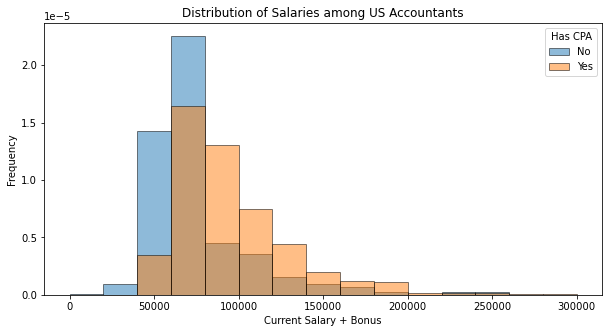

In [43]:
yes_no_cpa_df.groupby('Has CPA')['Current Salary + Bonus'].plot.hist(figsize=(10,5), bins=np.arange(0, 300_001, 20_000), alpha=0.5, edgecolor='black', density=True)
plt.xlabel('Current Salary + Bonus')
plt.title('Distribution of Salaries among US Accountants')
plt.legend(title='Has CPA')
plt.show()

There does seem to be a larger proportion of accountants who have their CPA in the higher salary ranges and a clustering of accountants without their CPA in the lower salary ranges

### Has CPA by `'Years Experience'`

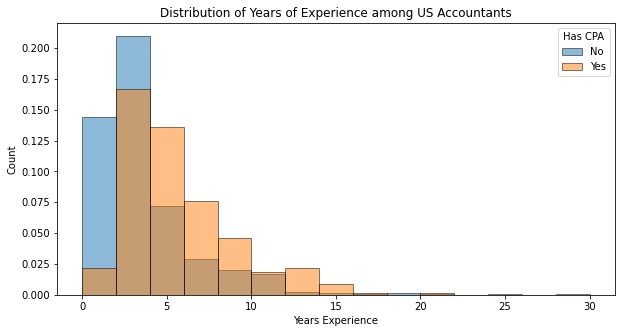

In [44]:
yes_no_cpa_df.groupby('Has CPA')['Years Experience'].plot.hist(figsize=(10,5), bins = np.arange(0, 31, 2), alpha=0.5, edgecolor='black', density=True)
plt.legend(title='Has CPA')
plt.xlabel('Years Experience')
plt.ylabel('Count')
plt.title('Distribution of Years of Experience among US Accountants')
plt.show()

In this distribution, we also see a higher proportion of accountants with their CPA as having more experience, which could also be contributing to the higher salaries we just observed. 

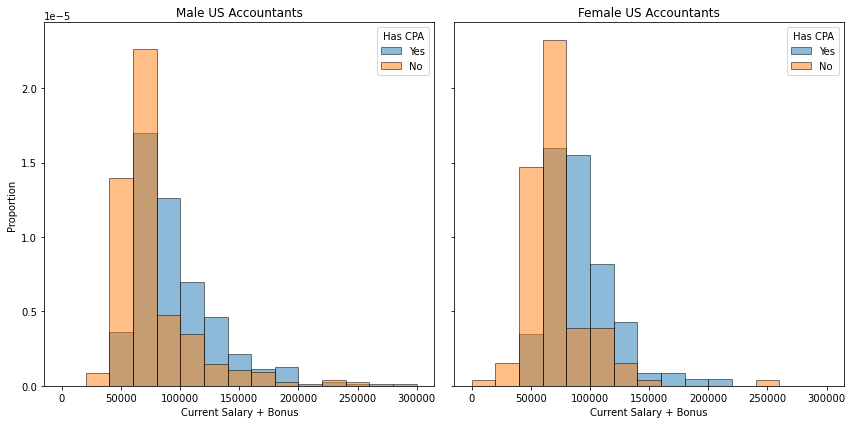

In [45]:
fig, ax = plt.subplots(1,2, figsize=(12,6), sharey=True)
cpa_and_gender_groups = yes_no_cpa_df.groupby(['Has CPA', 'Gender'])
cpa_and_gender_groups.get_group(('Yes', 'Male'))['Current Salary + Bonus'].hist(alpha=0.5, edgecolor='black', bins = np.arange(0, 300_001, 20_000), density=True, ax=ax[0], label='Yes')
cpa_and_gender_groups.get_group(('No', 'Male'))['Current Salary + Bonus'].hist(alpha=0.5, edgecolor='black', bins = np.arange(0, 300_001, 20_000), density=True, ax=ax[0], label='No')
ax[0].legend(title='Has CPA')
ax[0].set_xlabel('Current Salary + Bonus')
ax[0].set_ylabel('Proportion')
ax[0].grid(False)
ax[0].set_title('Male US Accountants')

cpa_and_gender_groups.get_group(('Yes', 'Female'))['Current Salary + Bonus'].hist(alpha=0.5, edgecolor='black', bins = np.arange(0, 300_001, 20_000), density=True, ax=ax[1], label='Yes')
cpa_and_gender_groups.get_group(('No', 'Female'))['Current Salary + Bonus'].hist(alpha=0.5, edgecolor='black', bins = np.arange(0, 300_001, 20_000), density=True, ax=ax[1], label='No')
ax[1].legend(title='Has CPA')
ax[1].set_xlabel('Current Salary + Bonus')
ax[1].grid(False)
ax[1].set_title('Female US Accountants')

#plt.suptitle('Salary + Bonus by Has CPA and Gender')
plt.tight_layout()
plt.show()

In each distribution, we see a higher proportion of accountants with higher Salaries than for those who have their CPA for both genders.

**To summarize: We see higher mean and median salaries for accountants who have their CPA, as well as higher proportions of accountants with their CPA in the higher salary ranges, regardless of Gender or Line of Service.  There is compelling evidence that having your CPA license will likely yield a higher annual salary.**

# Exploring by `Exit Status` - Do those who have worked in a public accounting firm and then exited to private firms make more than those who are currently in private firms and have never worked in public accounting?

In the accounting world, there are two domains: public accounting and corporate/private accounting.  In this section, I plan to see if working for a public accounting firm before transitioning to working for a corporate firm in their accounting department has an impact on one's salary as compared to accountants who started in corporate firms.

In [46]:
us_accounting

,Exit Status,Has CPA,Years Experience,Current Salary + Bonus,Years Public Before Exit,Current Industry,What COL is your region?,Gender,Line of Service,Average Hours Per Week,Outlier Salary
0,I am currently working at a Big 4 accounting firm,No,3.0,100000.0,NaN,Public Accounting,Medium,Female,Tax,NaN,No
1,I am currently working at a Big 4 accounting firm,No,3.0,63000.0,NaN,Public Accounting,High,Male,Audit,50.0,No
2,I am currently working at a mid-tier or local ...,No,3.0,61000.0,NaN,Public Accounting,High,Male,Tax,50.0,No
3,I am currently working at a mid-tier or local ...,No,3.0,67000.0,NaN,Public Accounting,High,Male,Other,40.0,No
4,I have never worked at a public accounting firm,No,4.5,72000.0,NaN,Construction,Medium,Male,Other,40.0,No
...,...,...,...,...,...,...,...,...,...,...,...
1191,I have already exited from a mid-tier or local...,Yes,8.0,149500.0,3.0,Construction,High,Male,Audit,45.0,No
1192,I am currently working at a mid-tier or local ...,Finishing Exp Req,1.0,54000.0,NaN,Public Accounting,Medium,Male,Tax,NaN,No
1193,I am still in school,No,3.0,64000.0,NaN,Public Accounting,High,Male,Audit,NaN,No
1194,I am currently working at a Big 4 accounting firm,No,1.0,66900.0,NaN,Public Accounting,Low,Female,Advisory,55.0,No


In [47]:
us_accounting['Exit Status'].unique()

array(['I am currently working at a Big 4 accounting firm',
       'I am currently working at a mid-tier or local accounting firm',
       'I have never worked at a public accounting firm',
       'I am still in school',
       'I have already exited from a Big 4 Accounting firm',
       'I have already exited from a mid-tier or local accounting firm'],
      dtype=object)

Because of the comparison we are trying to make, we'll want to focus solely on those who have never worked in a public accounting firm, versus those who did, then left for the private sector. This means we'll focus on the following three categories: 
1. I have never worked at a public accounting firm
2. I have already exited from a Big 4 Accounting firm
3. I have already exited from a mid-tier or local accounting firm

We'll start by creating a new dataframe that contains only these exit statuses and then group them into two categories:

1. Never been in a public accounting firm
2. Already exited a public accounting firm

In [48]:
def get_exit_status(x, status_list):
    if x == status_list[0]:
        return 'never_public'
    else:
        return 'exited_public'
    
exit_stats_of_interest = ['I have never worked at a public accounting firm', 'I have already exited from a Big 4 Accounting firm', 'I have already exited from a mid-tier or local accounting firm']

df_exit_stats_of_interest = us_accounting[us_accounting['Exit Status'].isin(exit_stats_of_interest)].copy(deep=True)

df_exit_stats_of_interest['Public?'] = df_exit_stats_of_interest['Exit Status'].apply(get_exit_status, args=[exit_stats_of_interest])

exit_stats_of_interest_groups = df_exit_stats_of_interest.groupby('Public?')

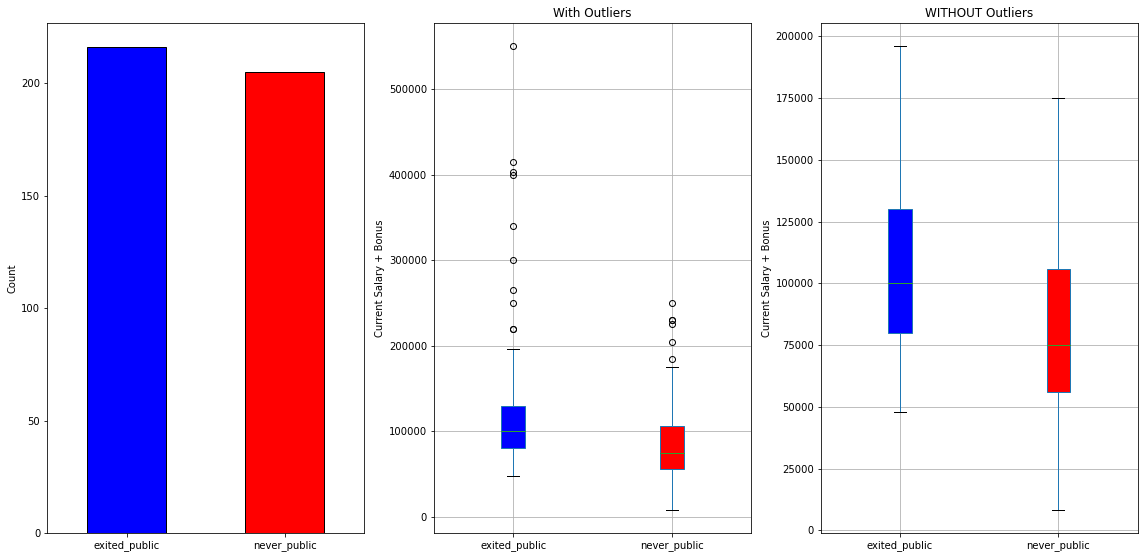


               count           mean           std      min      25%       50%       75%       max
Public?                                                                                          
exited_public  216.0  114857.027778  62966.072933  48000.0  80000.0  100000.0  130000.0  550000.0
never_public   205.0   85402.768293  39039.502736   8400.0  56000.0   75000.0  106000.0  250000.0



In [49]:
exit_stats_colors = ['blue', 'red']
fig = plt.figure(figsize=(16,8))
gs = GridSpec(1,3, figure=fig)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])

df_exit_stats_of_interest['Public?'].value_counts().plot.bar(ax=ax1, rot=0, edgecolor='black', color=exit_stats_colors)
ax1.set_ylabel('Count')

boxplot1 = df_exit_stats_of_interest.boxplot(column='Current Salary + Bonus', by='Public?', figsize=(8,8), ax=ax2, patch_artist=True, return_type='both')
ax2.set_title('With Outliers')
ax2.set_xlabel(None)
ax2.set_ylabel('Current Salary + Bonus')

boxplot2 = df_exit_stats_of_interest.boxplot(column='Current Salary + Bonus', by='Public?', figsize=(8,8), ax=ax3, patch_artist=True, return_type='both', showfliers=False)
ax3.set_title('WITHOUT Outliers')
ax3.set_xlabel(None)
ax3.set_ylabel('Current Salary + Bonus')

for row_key, (ax, row) in boxplot1.iteritems():
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(exit_stats_colors[i])

for row_key, (ax, row) in boxplot2.iteritems():
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(exit_stats_colors[i])
        
        
plt.suptitle(None)
plt.tight_layout()
plt.show()
print()
print(exit_stats_of_interest_groups['Current Salary + Bonus'].describe().to_string())
print()

* We have a healthy sample size of a little over 200 per category to investigate.  As the boxplots without outliers and descriptive statistics indicate, the range of salaries for those who exited a public firm to go into a private one is wider than for those who went straight into private accounting.  Furthermore, every quartile is higher. 

* Without outliers, the range of salaries for those who never went into public accounting is slightly wider, however this is only because it has more salaries packed in the lower end.   

We should do some more investigation, but this is starting to indicate one may expect to earn more if they start at a public accounting firm and then transition into an accounting role at a private company.

### What do the distribution of salaries tell us?

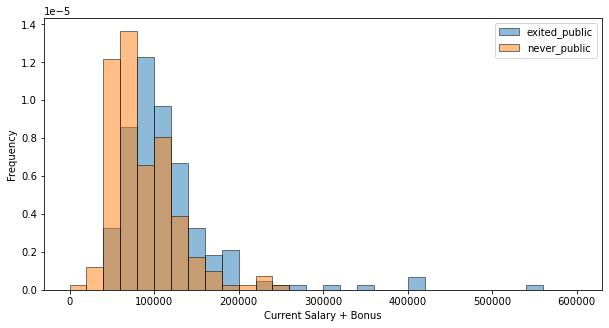

In [50]:
exit_stats_of_interest_groups['Current Salary + Bonus'].plot.hist(figsize=(10,5), bins = np.arange(0, 600_001, 20_000), edgecolor='black', alpha=0.5, density=True)
plt.legend()
plt.xlabel('Current Salary + Bonus')
plt.show()

The histogram above shows there are higher proportions of accountants earning higher salaries when they have exited a public firm, while there are higher proportions of accountants earning lower salaries for those who never worked in a public firm.  **More evidence indicating that working for a public firm first will reap financial benefits.** 

It might be worthwhile to perform a hypothesis test and see if these observed differences could be caused by random chance.

## Exploring by `Current Industry`

For this analysis, I'll again only choose industries based on a cutoff where the industry has a sample size of 30 or more.  The relevant industries appear to be:
1. Public Accounting
2. Other
3. Finance
4. Technology
5. Manufacturing
6. Medical
7. Government

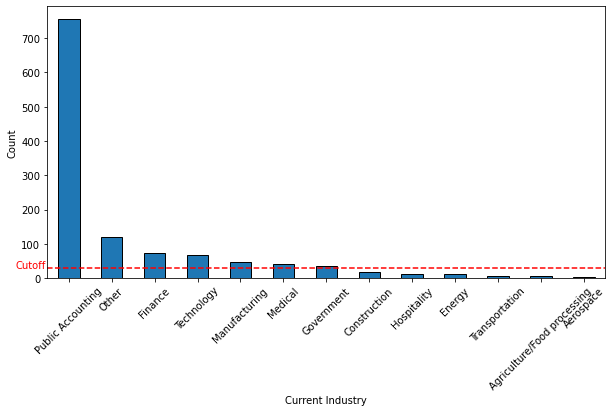

In [51]:
bar = us_accounting['Current Industry'].value_counts().plot.bar(figsize=(10,5), rot=45, edgecolor='black')
bar.axhline(30, color='red', linestyle='--')
bar.text(-1.25, 30, 'Cutoff', color='red', ha='left')
bar.set_xlabel('Current Industry')
bar.set_ylabel('Count')
plt.show()

Let's create a new dataframe that only contains these industries and then use it for our analysis

In [52]:
industry_df_greater_30 = us_accounting.groupby('Current Industry').filter(lambda x: len(x) >= 30)

### Gender by `Current Industry`

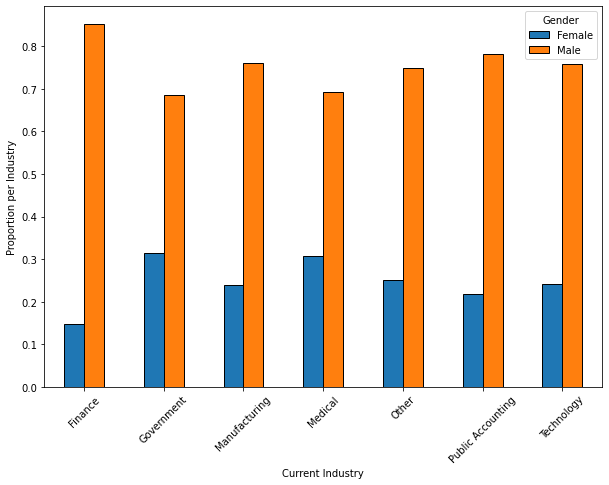

In [53]:
pd.crosstab(industry_df_greater_30[industry_df_greater_30['Gender']!='Undisclosed']['Current Industry'], industry_df_greater_30[industry_df_greater_30['Gender']!='Undisclosed']['Gender'], normalize='index').plot.bar(edgecolor='black', rot=45, figsize=(10,7))
plt.ylabel('Proportion per Industry')
plt.show()

Accounting appears to be very male dominated.  For each of the 7 most populated industries, the proportion of male accountants is two to three times as many, or more, as compared with female accountants.  The disparity appears to be most significant in Finance, with roughly 6-7 times as many male accountants as female ones.

### Mean/Median Salary by Industry - Does a certain industry earn more?

In [54]:
mean_median_by_industry = industry_df_greater_30.groupby('Current Industry').agg(['mean','median'])

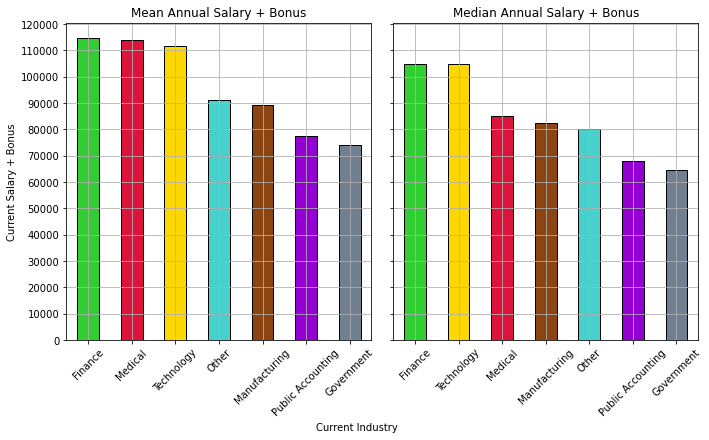

In [55]:
industry_clrs_dict = {'Finance':'limegreen', 'Government':'slategrey', 'Manufacturing':'saddlebrown', 'Medical':'crimson', 'Other':'mediumturquoise', 'Public Accounting':'darkviolet', 'Technology':'gold'}
fig, ax = plt.subplots(1,2, sharey=True, figsize=(10,6))

mean_color_list = []
for industry in mean_median_by_industry['Current Salary + Bonus', 'mean'].sort_values(ascending=False).index:
    mean_color_list.append(industry_clrs_dict[industry])
    
mean_median_by_industry['Current Salary + Bonus', 'mean'].sort_values(ascending=False).plot.bar(ax=ax[0], rot=45, color=mean_color_list, edgecolor='black')
ax[0].set_ylabel('Current Salary + Bonus')
ax[0].set_title('Mean Annual Salary + Bonus')
ax[0].grid()
ax[0].set_yticks(np.arange(0, 120_001, 10_000))
ax[0].set_xlabel(None)

median_color_list = []
for industry in mean_median_by_industry['Current Salary + Bonus', 'median'].sort_values(ascending=False).index:
    median_color_list.append(industry_clrs_dict[industry])


mean_median_by_industry['Current Salary + Bonus', 'median'].sort_values(ascending=False).plot.bar(ax=ax[1], rot=45, color=median_color_list, edgecolor='black')
ax[1].set_title('Median Annual Salary + Bonus')
ax[1].grid()
ax[1].set_xlabel(None)

fig.text(0.5, 0, 'Current Industry', ha='center', va='center')
plt.tight_layout()
plt.show()

* **Technology, Medical, and Finance rank among the top 3 for both Mean and Median Annual Salary + Bonus.**
* **Public Accounting and Government are at the bottom for both Mean and Median Annual Salary.**

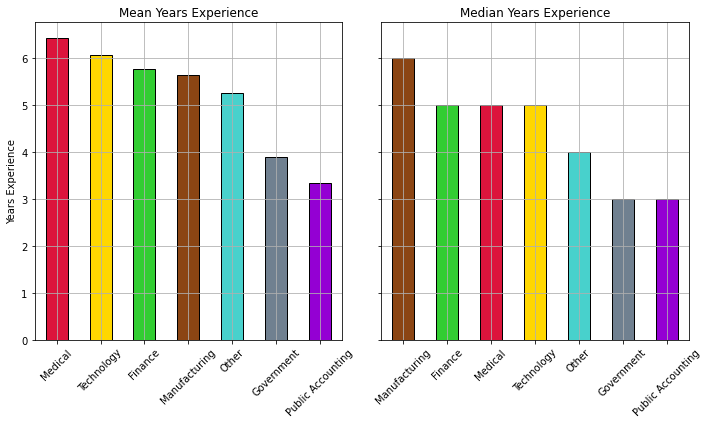

In [56]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(10,6))

mean_color_list=[]
for industry in mean_median_by_industry['Years Experience', 'mean'].sort_values(ascending=False).index:
    mean_color_list.append(industry_clrs_dict[industry])
mean_median_by_industry['Years Experience', 'mean'].sort_values(ascending=False).plot.bar(ax=ax[0], rot=45, edgecolor='black', color=mean_color_list)
ax[0].set_title('Mean Years Experience')
ax[0].set_xlabel(None)
ax[0].set_ylabel('Years Experience')
ax[0].grid()

median_color_list = []
for industry in mean_median_by_industry['Years Experience', 'median'].sort_values(ascending=False).index:
    median_color_list.append(industry_clrs_dict[industry])
mean_median_by_industry['Years Experience', 'median'].sort_values(ascending=False).plot.bar(ax=ax[1], rot=45, edgecolor='black', color=median_color_list)
ax[1].set_title('Median Years Experience')
ax[1].set_xlabel(None)
ax[1].grid()
#industry_df_greater_30.groupby('Current Industry').agg(['mean', 'median'])['Years Experience'].plot.bar()

plt.tight_layout()
plt.show()

* **Accountants in the Medical and Technology industries are in the top 3 for highest Mean and Median years experience.**
    * This could explain in part why we saw high mean/median salaries in these industries as well .
* **Accountants in Government and Public Accounting have the lowest Mean and Median Years Experience.**
    * The results for Public Accounting should make sense as accountants typically get their start at a public firm, then move into other industries.  This explains why we see Public Accountants in the bottom with regards to Years Experience.

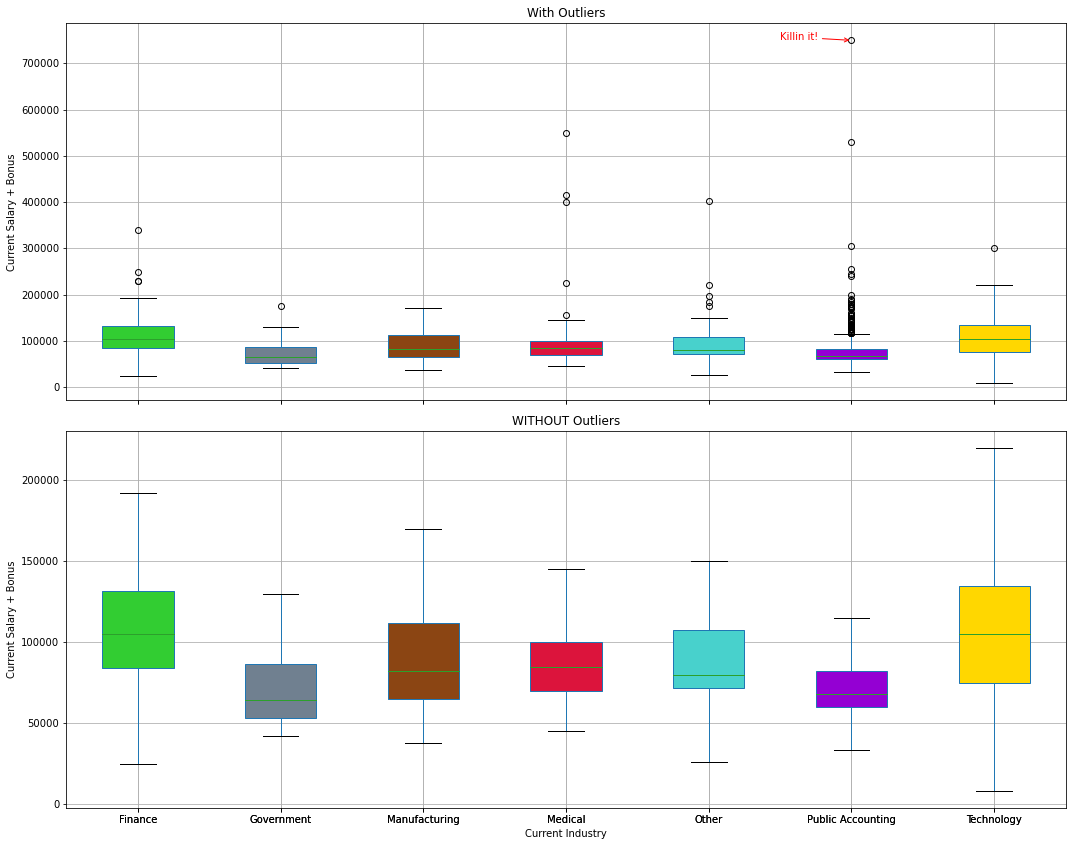

In [57]:
fig, ax = plt.subplots(2,1, figsize=(15,12), sharex=True)

boxes1 = industry_df_greater_30.boxplot(column='Current Salary + Bonus', by='Current Industry', return_type='both', patch_artist=True, ax=ax[0])
ax[0].set_title('With Outliers')
ax[0].set_ylabel('Current Salary + Bonus')
ax[0].set_xlabel(None)
ax[0].annotate('Killin it!', xy=(6, 750_000), xytext=(5.5, 750_000), color='red', arrowprops={'arrowstyle':'->', 'color':'red'})

boxes2 = industry_df_greater_30.boxplot(column='Current Salary + Bonus', by='Current Industry', return_type='both', patch_artist=True, ax=ax[1], showfliers=False)
ax[1].set_ylabel('Current Salary + Bonus')
ax[1].set_title('WITHOUT Outliers')

color_list = []
for label in ax[1].get_xticklabels():
    industry = label.get_text()
    if industry=='':
        break
    else:
        color = industry_clrs_dict[industry]
        color_list.append(color)

for row_key, (ax, row) in boxes1.iteritems():
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(color_list[i])

for row_key, (ax, row) in boxes2.iteritems():
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(color_list[i])

fig.suptitle(None)

plt.tight_layout()
plt.show()

**WITHOUT Outliers:**
* Technology and Finance have the widest range of salaries and the two maximum salaries.
* Government and Public accounting have the narrowest range of salaries.

**With Outliers:**
* Government, Manufacturing, and Technology have the least salaries considered to be outliers, with Manufacturing having no outliers at all.
* Public Accounting has the largest range of salaries because of one outlier salary, the same guy we saw earlier in our analysis, who is making 750,000 annually!  Otherwise, Medical would have the greatest range.

## Comparing two types of accountants across industry - What private industries do accountants who have exited a public accounting firm work at versus what private industries do accountants who have never worked in public accounting work at?

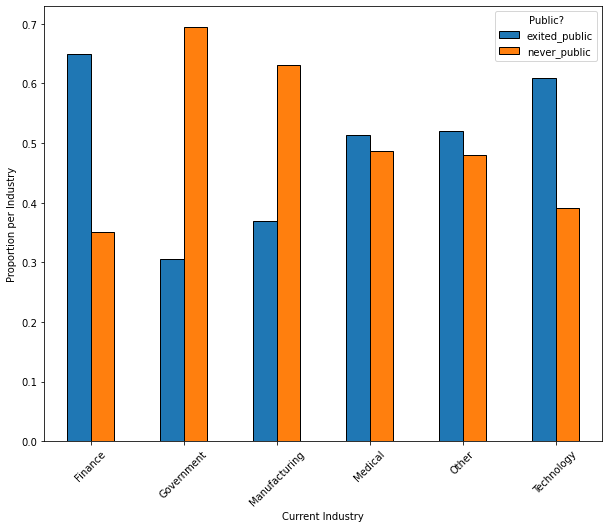

In [58]:
pd.crosstab(df_exit_stats_of_interest.groupby('Current Industry').filter(lambda x: len(x)>=30)['Current Industry'], df_exit_stats_of_interest.groupby('Current Industry').filter(lambda x: len(x)>=30)['Public?'], normalize='index').plot.bar(edgecolor='black', rot=45, figsize=(10,8))
plt.ylabel('Proportion per Industry')
plt.show()

* **Finance and technology have the greater proportion of accountants who first worked in a public accounting firm.**
* **Government and Manufacturing have the greatest proportion of accountants who never worked in a public accounting firm.**

This new information presents an interesting question.  We saw earlier that having a CPA tended to mean higher salaries, so could we be seeing higher mean and median salaries in the Finance and technology sector because they have a fairly significant proportion of accountants with their CPA?

**Conclusion: The Finance, Technology, and Medical industries seem to be the best industries to get in as they have higher mean and median salaries, as well as wider salary ranges, however it's not yet clear if this is because accountants in these industries tend to have more expeirence and or their CPA license.**

## Revisiting our quantitative data again

### Exploring Years Experience by `'Current Salary + Bonus'`

Earlier, we saw that the accountants in the survey that were considered outliers based on their salary tended to have more experience than the other accountants.  We also saw that those who have their CPA tend to earn more and those with their CPA tend to have more experience.  Even without these previous observations, it's reasonable to expect some relationship between one's salary and years experience.  Let's investigate this relationship.

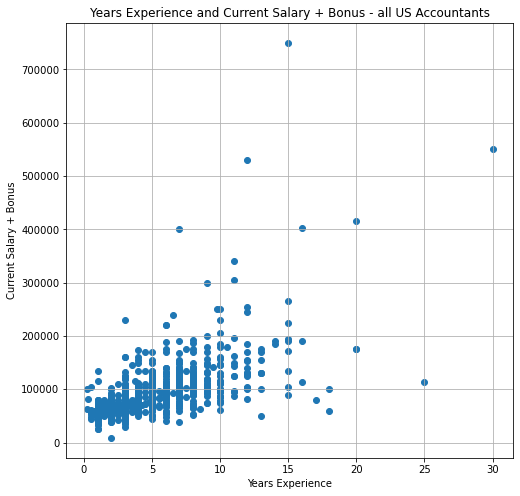

In [59]:
salaries = us_accounting['Current Salary + Bonus']
years_exp = us_accounting['Years Experience']
plt.figure(figsize=(8,8))
plt.scatter(years_exp, salaries)
plt.title('Years Experience and Current Salary + Bonus - all US Accountants')
plt.xlabel('Years Experience')
plt.ylabel('Current Salary + Bonus')
plt.grid();

As we expected, there does appear to be a positive relationship between Years Experience and Current Salary + Bonus.  Do we see a similar trend when comparing those who have their CPA against those who don't?

### Salary and Years Experience by Has CPA

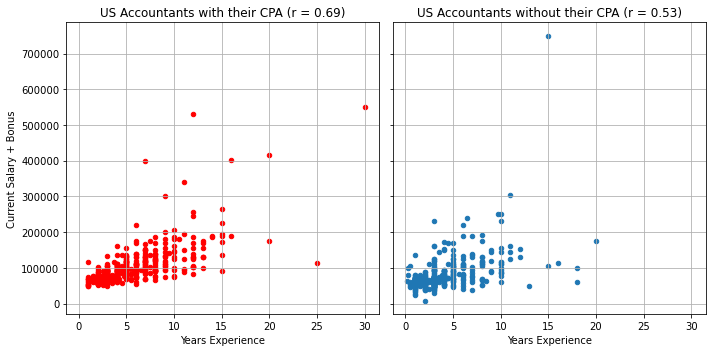

In [60]:
cpa_group_df = yes_no_cpa_df.groupby('Has CPA')

cpa_yes_cor = cpa_group_df.get_group('Yes').corr().iloc[0,1]
cpa_no_cor = cpa_group_df.get_group('No').corr().iloc[0,1]

fig, ax = plt.subplots(1,2, figsize=(10,5), sharex=True, sharey=True)
cpa_group_df.get_group('Yes').plot.scatter('Years Experience', 'Current Salary + Bonus', ax=ax[0], color='red')
ax[0].grid()
ax[0].set_title('US Accountants with their CPA (r = {:.2f})'.format(cpa_yes_cor))

cpa_group_df.get_group('No').plot.scatter('Years Experience', 'Current Salary + Bonus', ax=ax[1])
ax[1].grid()
ax[1].set_title('US Accountants without their CPA (r = {:.2f})'.format(cpa_no_cor))


plt.tight_layout()
plt.show()

There seems to be a positive correlation between Years Experience and Current Salary + Bonus regardless of whether one has their CPA or not, however the correlation coefficient is a good bit stronger for those who have their CPA, as can be seen in the title of the scatterplot above.  This lends further evidence that getting your CPA is worthwhile.  

**Note: These correlation coefficients are linear and it's not yet clear whether this association is best classified as linear or not, we will do further investigation later.**

### Salary and Years Experience by Gender

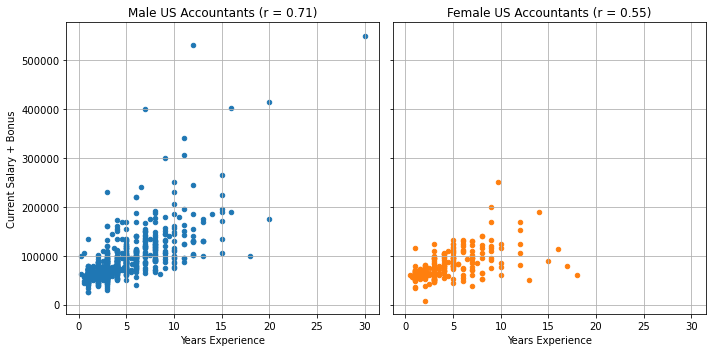

In [61]:
men = m_f_groups.get_group('Male')
women = m_f_groups.get_group('Female')

male_corr = men.corr().iloc[0,1]
female_corr = women.corr().iloc[0,1]

fig, ax = plt.subplots(1, 2, figsize=(10,5), sharex=True, sharey=True)
men.plot.scatter('Years Experience', 'Current Salary + Bonus', ax=ax[0], color='tab:blue')
ax[0].grid()
ax[0].set_title('Male US Accountants (r = {:.2f})'.format(male_corr))

women.plot.scatter('Years Experience', 'Current Salary + Bonus', ax=ax[1], color='tab:orange')
ax[1].grid()
ax[1].set_title('Female US Accountants (r = {:.2f})'.format(female_corr))

plt.tight_layout()
plt.show()

We continue to see a positive correlation between Years Experience and Current Salary + Bonus regardless of gender.

### Salary and Years Experience by Line of Service

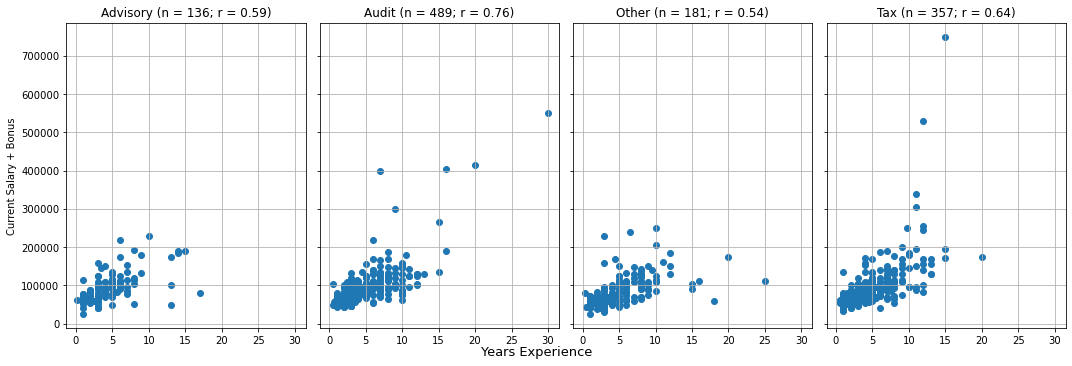

In [62]:
los_groups = us_accounting.groupby('Line of Service')

num_groups = len(list(los_groups.groups.keys()))
fig, ax = plt.subplots(1, 4, figsize=(15,5), sharex = True, sharey=True)
i=0
for name,group in los_groups:
    sample_size = len(los_groups.get_group(name))
    if sample_size >= 30:
        yrs_exp_salary_corr = los_groups.get_group(name).corr().iloc[0,1]
        ax[i].scatter(group['Years Experience'], group['Current Salary + Bonus'], label=name)
        ax[i].set_title(name + ' (n = {}; r = {:.2f})'.format(sample_size, yrs_exp_salary_corr))
        ax[i].grid()
        #quantile = group['Current Salary + Bonus'].quantile(0.9)
        #ax[i].axhline(quantile, color='red')
        i+=1
ax[0].set_ylabel('Current Salary + Bonus')
#fig.text(0.5, 0.998, 'Non-normalized', ha='center', va='center', fontsize=15)
fig.text(0.5, 0.01, 'Years Experience', ha='center', va='center', fontsize=13)
plt.tight_layout()


We see a positive association across all lines of service as well, with Audit and Tax showing the highest linear correlation, however these lines of service have the most outliers and the correlation coefficient will be affected as a result.  Let's see what happens if we remove salaries that are considered outliers using our $\pm2\sigma$ rule from earlier.

### Salary and Years Experience by Line of Service - WITHOUT Outliers

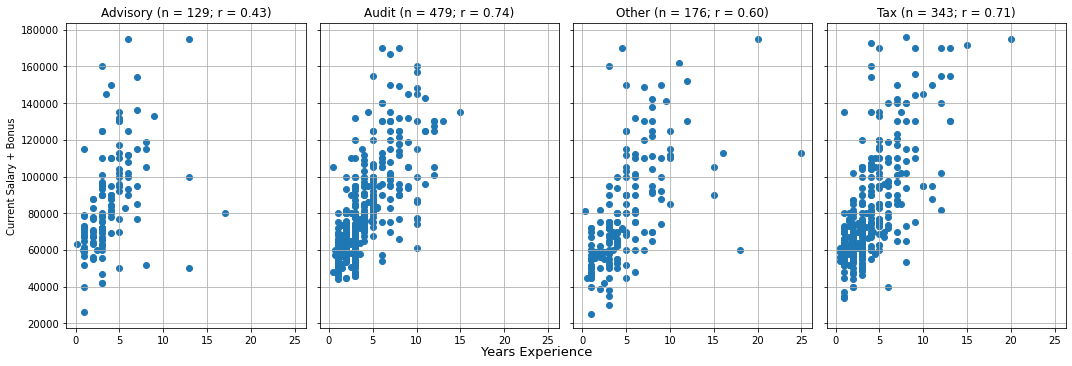

In [63]:
los_groups_without_outliers = salaries_without_outliers.groupby('Line of Service')

num_groups = len(list(los_groups_without_outliers.groups.keys()))
fig, ax = plt.subplots(1, 4, figsize=(15,5), sharex = True, sharey=True)
i=0
for name,group in los_groups_without_outliers:
    sample_size = len(los_groups_without_outliers.get_group(name))
    if sample_size >= 30:
        yrs_exp_salary_corr = los_groups_without_outliers.get_group(name).corr().iloc[0,1]
        ax[i].scatter(group['Years Experience'], group['Current Salary + Bonus'], label=name)
        ax[i].set_title(name + ' (n = {}; r = {:.2f})'.format(sample_size, yrs_exp_salary_corr))
        ax[i].grid()
        #quantile = group['Current Salary + Bonus'].quantile(0.9)
        #ax[i].axhline(quantile, color='red')
        i+=1
ax[0].set_ylabel('Current Salary + Bonus')
#fig.text(0.5, 0.998, 'Non-normalized', ha='center', va='center', fontsize=15)
fig.text(0.5, 0.01, 'Years Experience', ha='center', va='center', fontsize=13)
plt.tight_layout()


Interestingly enough, we still see the highest correlation coefficient in Audit and then in Tax at 0.74 and 0.71 respectively.

Although it's not yet clear whether a linear association is present among `Years Experience` and `Current Salary + Bonus`, the scatter plots reveal the positive relationship we suspected, for all lines of service, regardless of whether one has their CPA, and for both genders.

# Stuff that's prob not needed but keeping for now

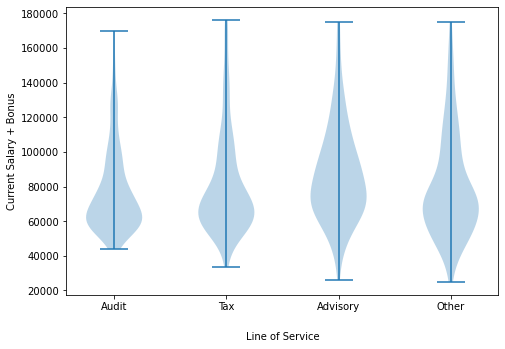

In [64]:
audit = salaries_without_outliers[salaries_without_outliers['Line of Service']=='Audit']['Current Salary + Bonus'].values
tax = salaries_without_outliers[salaries_without_outliers['Line of Service']=='Tax']['Current Salary + Bonus'].values
advisory = salaries_without_outliers[salaries_without_outliers['Line of Service']=='Advisory']['Current Salary + Bonus'].values
other = salaries_without_outliers[salaries_without_outliers['Line of Service']=='Other']['Current Salary + Bonus'].values
common_los = [audit, tax, advisory, other]

fig = plt.figure()
ind = np.arange(1, 4.1, 1)
ax = fig.add_axes([0,0,1,1])
ax.violinplot(common_los)
ax.set_xticks(ind)
ax.set_xticklabels(['Audit', 'Tax', 'Advisory', 'Other'])
ax.xaxis.labelpad = 20
plt.xlabel('Line of Service')
plt.ylabel('Current Salary + Bonus')
plt.show()